
# Business Cases with Data Science 

## Case 3: Prediction of Bookings Cancellation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Pedro Santos (M20190420)
2. Ana Claudia Alferes (M20190932)
3. Lennart Dangers (M20190251)
4. Michael Machatschek (M20190054)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

This jupypter-notebook provides the code in python to do a customer segmentation of a given dataset. A more detailed description of this project and the solutions can be found in the report. 

# Step 1: Business Understanding

Please consult our report for further details. 

# Step 2: Data Understanding

## Dataset Description

A data dictionary is available in the appendix of our report.
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn.preprocessing import MinMaxScaler
import plotly.offline as po 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv("data.csv")

In [86]:
df.describe(include="all").T

count unique               top   freq  \
IsCanceled                   79330    NaN               NaN    NaN   
LeadTime                     79330    NaN               NaN    NaN   
ArrivalDateYear              79330    NaN               NaN    NaN   
ArrivalDateMonth             79330     12            August   8983   
ArrivalDateWeekNumber        79330    NaN               NaN    NaN   
ArrivalDateDayOfMonth        79330    NaN               NaN    NaN   
StaysInWeekendNights         79330    NaN               NaN    NaN   
StaysInWeekNights            79330    NaN               NaN    NaN   
Adults                       79330    NaN               NaN    NaN   
Children                     79326    NaN               NaN    NaN   
Babies                       79330    NaN               NaN    NaN   
Meal                         79330      4         BB         62305   
Country                      79306    166               PRT  30960   
MarketSegment                79330      8         Online TA  38748   
DistributionChannel          79330      5             TA/TO  68945   
IsRepeatedGuest              79330    NaN               NaN    NaN   
PreviousCancellations        79330    NaN               NaN    NaN   
PreviousBookingsNotCanceled  79330    NaN               NaN    NaN   
ReservedRoomType             79330      8  A                 62595   
AssignedRoomType             79330      9  A                 57007   
BookingChanges               79330    NaN               NaN    NaN   
DepositType                  79330      3   No Deposit       66442   
Agent                        79330    224                 9  31955   
Company                      79330    208              NULL  75641   
DaysInWaitingList            79330    NaN               NaN    NaN   
CustomerType                 79330      4         Transient  59404   
ADR                          79330    NaN               NaN    NaN   
RequiredCarParkingSpaces     79330    NaN               NaN    NaN   
TotalOfSpecialRequests       79330    NaN               NaN    NaN   
ReservationStatus            79330      3         Check-Out  46228   
ReservationStatusDate        79330    864        2015-10-21   1416   

                                   mean        std   min   25%   50%   75%  \
IsCanceled                      0.41727   0.493111     0     0     0     1   
LeadTime                        109.736    110.949     0    23    74   163   
ArrivalDateYear                 2016.17   0.699181  2015  2016  2016  2017   
ArrivalDateMonth                    NaN        NaN   NaN   NaN   NaN   NaN   
ArrivalDateWeekNumber           27.1774    13.3985     1    17    27    38   
ArrivalDateDayOfMonth           15.7866    8.72845     1     8    16    23   
StaysInWeekendNights           0.795185   0.885026     0     0     1     2   
StaysInWeekNights               2.18296    1.45642     0     1     2     3   
Adults                          1.85098   0.509292     0     2     2     2   
Children                      0.0913698   0.372177     0     0     0     0   
Babies                       0.00494138  0.0843233     0     0     0     0   
Meal                                NaN        NaN   NaN   NaN   NaN   NaN   
Country                             NaN        NaN   NaN   NaN   NaN   NaN   
MarketSegment                       NaN        NaN   NaN   NaN   NaN   NaN   
DistributionChannel                 NaN        NaN   NaN   NaN   NaN   NaN   
IsRepeatedGuest               0.0256145   0.157983     0     0     0     0   
PreviousCancellations         0.0797428   0.415472     0     0     0     0   
PreviousBookingsNotCanceled    0.132371    1.69341     0     0     0     0   
ReservedRoomType                    NaN        NaN   NaN   NaN   NaN   NaN   
AssignedRoomType                    NaN        NaN   NaN   NaN   NaN   NaN   
BookingChanges                 0.187369    0.60862     0     0     0     0   
DepositType                         NaN        NaN   NaN   NaN   NaN   N

In [87]:
df.columns.values

array(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment',
       'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType',
       'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent',
       'Company', 'DaysInWaitingList', 'CustomerType', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests',
       'ReservationStatus', 'ReservationStatusDate'], dtype=object)

In [88]:
non_numerical_var = ["Agent", "ArrivalDateMonth",
                    "ArrivalDateWeekNumber", "ArrivalDateDayOfMonth","ArrivalDateYear","AssignedRoomType",
                     "Company", "Country", "CustomerType","DepositType",
                     "DistributionChannel", "IsCanceled", "IsRepeatedGuest", "MarketSegment",
                     "Meal", "ReservationStatus",
                     "ReservationStatusDate", "ReservedRoomType"]
numerical_var = list(set(df.columns.values) - set(non_numerical_var))

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
IsCanceled                     79330 non-null int64
LeadTime                       79330 non-null int64
ArrivalDateYear                79330 non-null int64
ArrivalDateMonth               79330 non-null object
ArrivalDateWeekNumber          79330 non-null int64
ArrivalDateDayOfMonth          79330 non-null int64
StaysInWeekendNights           79330 non-null int64
StaysInWeekNights              79330 non-null int64
Adults                         79330 non-null int64
Children                       79326 non-null float64
Babies                         79330 non-null int64
Meal                           79330 non-null object
Country                        79306 non-null object
MarketSegment                  79330 non-null object
DistributionChannel            79330 non-null object
IsRepeatedGuest                79330 non-null int64
PreviousCancellations          79330 non-null int64


In [90]:
df.isnull().sum()

IsCanceled                      0
LeadTime                        0
ArrivalDateYear                 0
ArrivalDateMonth                0
ArrivalDateWeekNumber           0
ArrivalDateDayOfMonth           0
StaysInWeekendNights            0
StaysInWeekNights               0
Adults                          0
Children                        4
Babies                          0
Meal                            0
Country                        24
MarketSegment                   0
DistributionChannel             0
IsRepeatedGuest                 0
PreviousCancellations           0
PreviousBookingsNotCanceled     0
ReservedRoomType                0
AssignedRoomType                0
BookingChanges                  0
DepositType                     0
Agent                           0
Company                         0
DaysInWaitingList               0
CustomerType                    0
ADR                             0
RequiredCarParkingSpaces        0
TotalOfSpecialRequests          0
ReservationSta

In [91]:
for col in non_numerical_var:
    print("--------------------" + col + "--------------------")
    print(df[col].value_counts())
    print("\n")

--------------------Agent--------------------
          9    31955
       NULL     8131
          1     7137
         14     3640
          7     3539
               ...  
        444        1
        299        1
        427        1
         90        1
        280        1
Name: Agent, Length: 224, dtype: int64


--------------------ArrivalDateMonth--------------------
August       8983
May          8232
July         8088
June         7894
October      7605
April        7480
September    7400
March        6458
February     4965
November     4357
December     4132
January      3736
Name: ArrivalDateMonth, dtype: int64


--------------------ArrivalDateWeekNumber--------------------
33    2383
42    2032
20    2016
30    2011
32    1991
17    1965
25    1959
34    1950
21    1948
18    1914
38    1887
23    1869
28    1865
27    1854
41    1842
39    1833
24    1823
15    1783
29    1726
40    1722
22    1697
26    1670
16    1650
35    1642
19    1640
31    1640
13    1605
37    1596


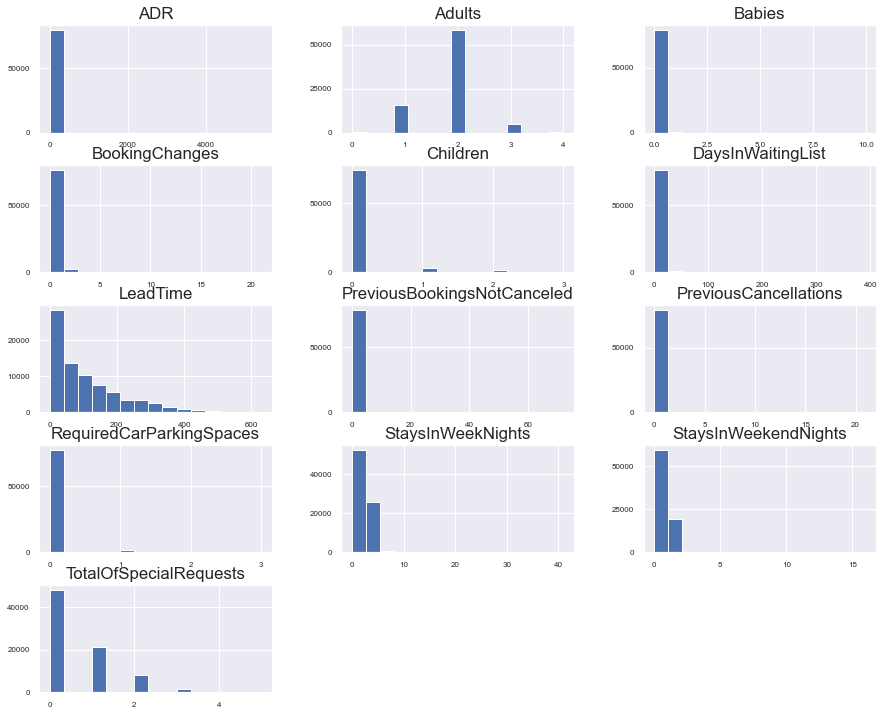

In [92]:
# Do histograms on all numeric variables
df[numerical_var].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

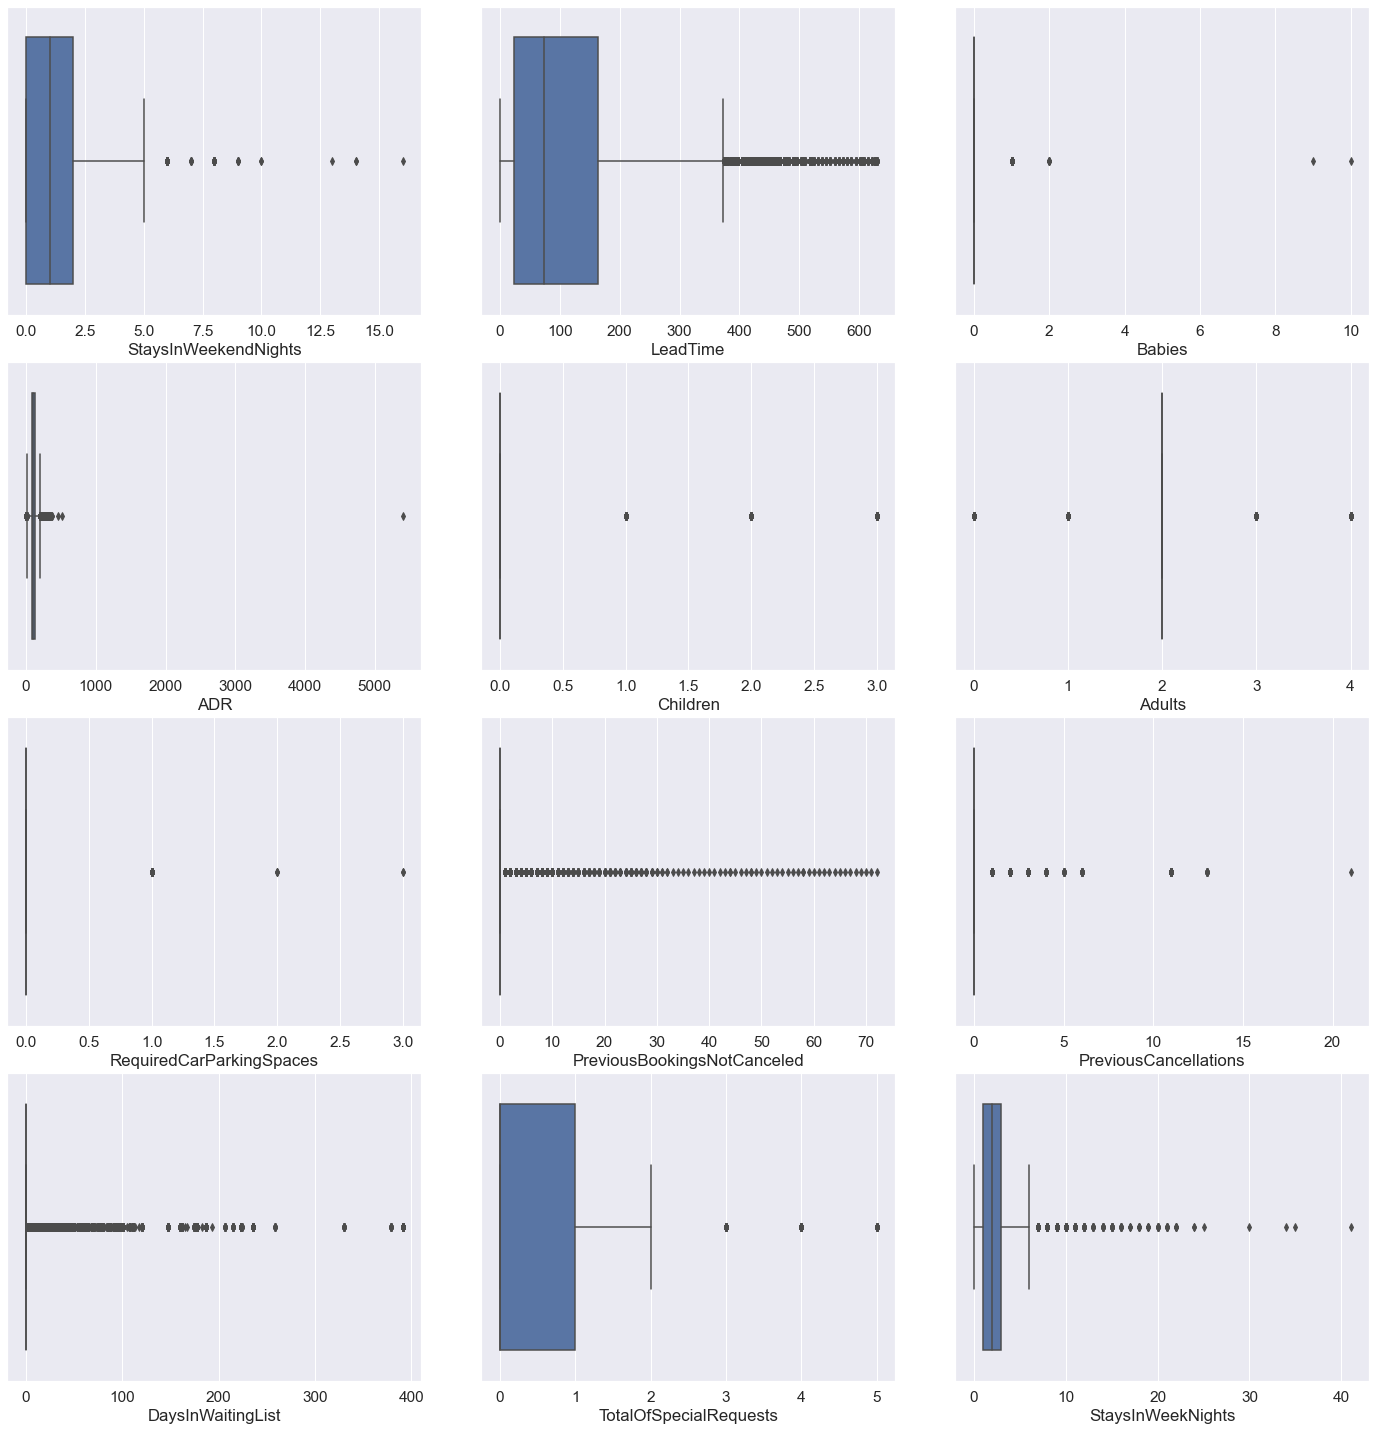

In [93]:
#boxplots to detect outliers
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical_var], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

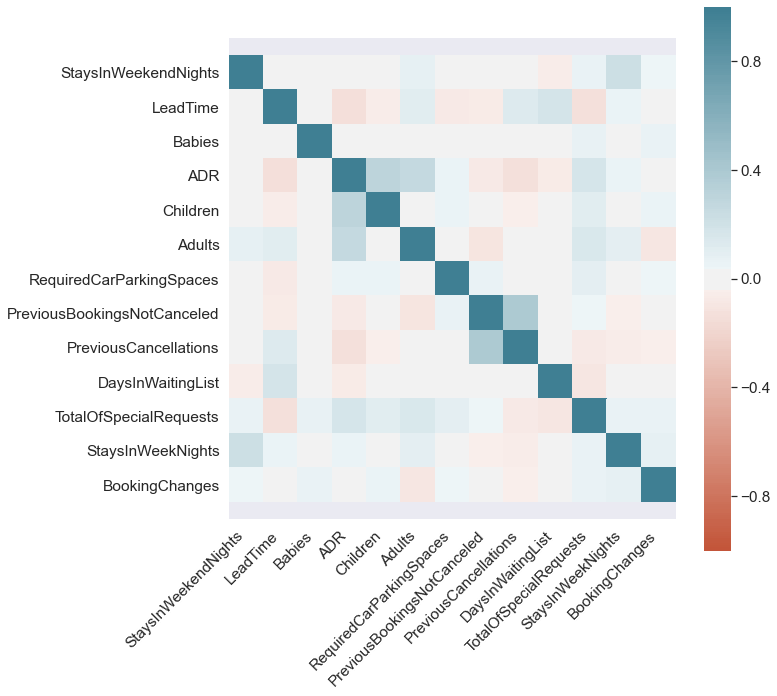

In [94]:
corr = df[numerical_var].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [95]:
can = df[df.IsCanceled == 1].IsCanceled.count()
Ncan = df[df.IsCanceled == 0].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=300, width=400, title_text="Canceled vs. Not Canceled")
fig.show()

In [96]:
can = df[df.IsCanceled == 1][["ArrivalDateYear","IsCanceled"]].groupby(["ArrivalDateYear"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ArrivalDateYear","IsCanceled"]].groupby(["ArrivalDateYear"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ArrivalDateYear", right_on="ArrivalDateYear" ) 

fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['ArrivalDateYear'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['ArrivalDateYear'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Year", plot_bgcolor="white")
fig.show()

can = df[df.IsCanceled == 1][["ArrivalDateMonth","IsCanceled"]].groupby(["ArrivalDateMonth"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ArrivalDateMonth","IsCanceled"]].groupby(["ArrivalDateMonth"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ArrivalDateMonth", right_on="ArrivalDateMonth" ) 

fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['ArrivalDateMonth'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['ArrivalDateMonth'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Month", plot_bgcolor="white")
fig.show() 

In [97]:
can = df[df.IsCanceled == 1][["Agent","IsCanceled"]].groupby(["Agent"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Agent","IsCanceled"]].groupby(["Agent"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "Agent", right_on="Agent" ).head() 
print(pf_group)

x=[1,2,3,4,5]

fig = go.Figure(go.Bar(x=x, y=pf_group.IsCanceled_x, name='Canceled'))
fig.add_trace(go.Bar(x=x, y=pf_group.IsCanceled_y, name='Not Canceled'))

fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

         Agent  IsCanceled_x  IsCanceled_y
0            9         13262         18693
1            1          5230          1907
2         NULL          2609          5522
3            6           966          1717
4           19           780           281


In [98]:
can = df[df.IsCanceled == 1][["ReservedRoomType","IsCanceled"]].groupby(["ReservedRoomType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["ReservedRoomType","IsCanceled"]].groupby(["ReservedRoomType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "ReservedRoomType", right_on="ReservedRoomType" ).head() 

x=pf_group.ReservedRoomType.values

fig = go.Figure(go.Bar(x=x, y=pf_group.IsCanceled_x, name='Canceled'))
fig.add_trace(go.Bar(x=x, y=pf_group.IsCanceled_y, name='Not Canceled'))

fig.update_layout(barmode='stack',xaxis={'categoryorder':'total descending'})
fig.show()

In [99]:
R = df[df.ReservedRoomType == df.AssignedRoomType].IsCanceled.count()
W = df[df.ReservedRoomType != df.AssignedRoomType].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Right Assigned Room','Wrong Assigned Room'], values=[R, W]))
fig.update_layout(height=500, width=500, title_text="Assigned Room Type")
fig.show()

In [100]:
df['FamilySize'] = df['Adults'] + df['Children'] + df['Babies']
df_F = df[df.FamilySize != 0]

can = df_F[df_F.IsCanceled == 1][["FamilySize","IsCanceled"]].groupby(["FamilySize"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df_F[df_F.IsCanceled == 0][["FamilySize","IsCanceled"]].groupby(["FamilySize"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "FamilySize", right_on="FamilySize" ) 
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['FamilySize'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['FamilySize'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Family Size", plot_bgcolor="white")
fig.show() 

In [101]:
can = df[(df.IsCanceled == 1) & (df.BookingChanges>=1)][["BookingChanges","IsCanceled"]].IsCanceled.count() 
Ncan= df[(df.IsCanceled == 0) & (df.BookingChanges>=1)][["BookingChanges","IsCanceled"]].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=500, width=500, title_text="Booking with at least 1 Booking Change")
fig.show()

In [102]:
can = df[df.IsCanceled == 1][["Country","IsCanceled"]].groupby(["Country"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Country","IsCanceled"]].groupby(["Country"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "Country", right_on="Country" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['Country'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['Country'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Country", plot_bgcolor="white")
fig.show() 

#Remember this one it's problematic since we just know the real country from the customer when the customer arrives

In [103]:
can = df[df.IsCanceled == 1][["CustomerType","IsCanceled"]].groupby(["CustomerType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["CustomerType","IsCanceled"]].groupby(["CustomerType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()

pf_group = can.merge(Ncan, left_on= "CustomerType", right_on="CustomerType" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['CustomerType'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['CustomerType'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Customer Type", plot_bgcolor="white")
fig.show() 

In [104]:
can = df[df.IsCanceled == 1][["DepositType","IsCanceled"]].groupby(["DepositType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["DepositType","IsCanceled"]].groupby(["DepositType"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "DepositType", right_on="DepositType" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['DepositType'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['DepositType'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Deposit Type", plot_bgcolor="white")
fig.show() 

In [105]:
can = df[df.IsCanceled == 1][["DistributionChannel","IsCanceled"]].groupby(["DistributionChannel"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["DistributionChannel","IsCanceled"]].groupby(["DistributionChannel"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "DistributionChannel", right_on="DistributionChannel" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['DistributionChannel'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['DistributionChannel'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Distribution Channel", plot_bgcolor="white")
fig.show()

can = df[df.IsCanceled == 1][["MarketSegment","IsCanceled"]].groupby(["MarketSegment"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["MarketSegment","IsCanceled"]].groupby(["MarketSegment"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "MarketSegment", right_on="MarketSegment" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['MarketSegment'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['MarketSegment'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Market Segment", plot_bgcolor="white")
fig.show()

In [106]:
can = df[(df.IsRepeatedGuest == 1)][["IsRepeatedGuest","IsCanceled"]].IsCanceled.count() 
Ncan= df[(df.IsRepeatedGuest == 0)][["IsRepeatedGuest","IsCanceled"]].IsCanceled.count()

fig = go.Figure(go.Pie(labels=['Repeat Customer','First Time Customer'], values=[can, Ncan]))
fig.update_layout(height=300, width=600, title_text="Check for repeat customers")
fig.show()

In [107]:
fig = go.Figure(data=[ 
    go.Histogram(x=df[df.IsCanceled == 1].LeadTime,nbinsx=50, name="Canceled"),
    go.Histogram(x=df[df.IsCanceled == 0].LeadTime,nbinsx=50, name="Not Canceled")])

fig.update_layout(title_text="Lead time in Canceled and Not Canceled Bookings")
fig.show() 

In [108]:
can = df[df.IsCanceled == 1][["Meal","IsCanceled"]].groupby(["Meal"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["Meal","IsCanceled"]].groupby(["Meal"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "Meal", right_on="Meal" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['Meal'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['Meal'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Market Segment", plot_bgcolor="white")
fig.show()

In [109]:
can = df[df.IsCanceled == 1].PreviousCancellations.sum()
Ncan = df[df.IsCanceled == 0].PreviousCancellations.sum()

fig = go.Figure(go.Pie(labels=['Canceled','Not Canceled'], values=[can, Ncan]))
fig.update_layout(height=500, width=500, title_text="Previous Cancellations")
fig.show()

In [110]:
can = df[df.IsCanceled == 1] 
Ncan = df[df.IsCanceled == 0] 

fig = make_subplots(2,2, subplot_titles=["Canceled Weekend","Canceled Week"
                                        , "Not Canceled Weekend", "Not Canceled Week"])

fig.add_trace(go.Histogram(x=can.StaysInWeekendNights, name="Restaurant Day"),1,1)
fig.add_trace(go.Histogram(x=can.StaysInWeekNights, name="Delivery Day"),1,2)

fig.add_trace(go.Histogram(x=Ncan.StaysInWeekendNights, name="Restaurant Month"),2,1)
fig.add_trace(go.Histogram(x=Ncan.StaysInWeekNights, name="Delivery Month"),2,2)

fig.update_layout(title_text="Number of nights booked", plot_bgcolor="white", showlegend=False)

fig.show() 

In [111]:
can = df[df.IsCanceled == 1][["TotalOfSpecialRequests","IsCanceled"]].groupby(["TotalOfSpecialRequests"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index() 
Ncan= df[df.IsCanceled == 0][["TotalOfSpecialRequests","IsCanceled"]].groupby(["TotalOfSpecialRequests"]).count().sort_values(by = "IsCanceled", ascending = False).reset_index()


pf_group = can.merge(Ncan, left_on= "TotalOfSpecialRequests", right_on="TotalOfSpecialRequests" ).head()
fig = go.Figure(data=[ 
    go.Bar(name='Canceled', x=pf_group['TotalOfSpecialRequests'], y=pf_group['IsCanceled_x']), 
    go.Bar(name='Not Canceled', x=pf_group['TotalOfSpecialRequests'], y=pf_group['IsCanceled_y']) 
]) 

# Change the bar mode 
fig.update_layout(barmode="group",height=300, width=600, title_text="Canceled vs. Not Canceled by Total of Special Requests", plot_bgcolor="white")
fig.show()

## Summary Data Understanding / Data Exploration


# Step 3: Data Preparation

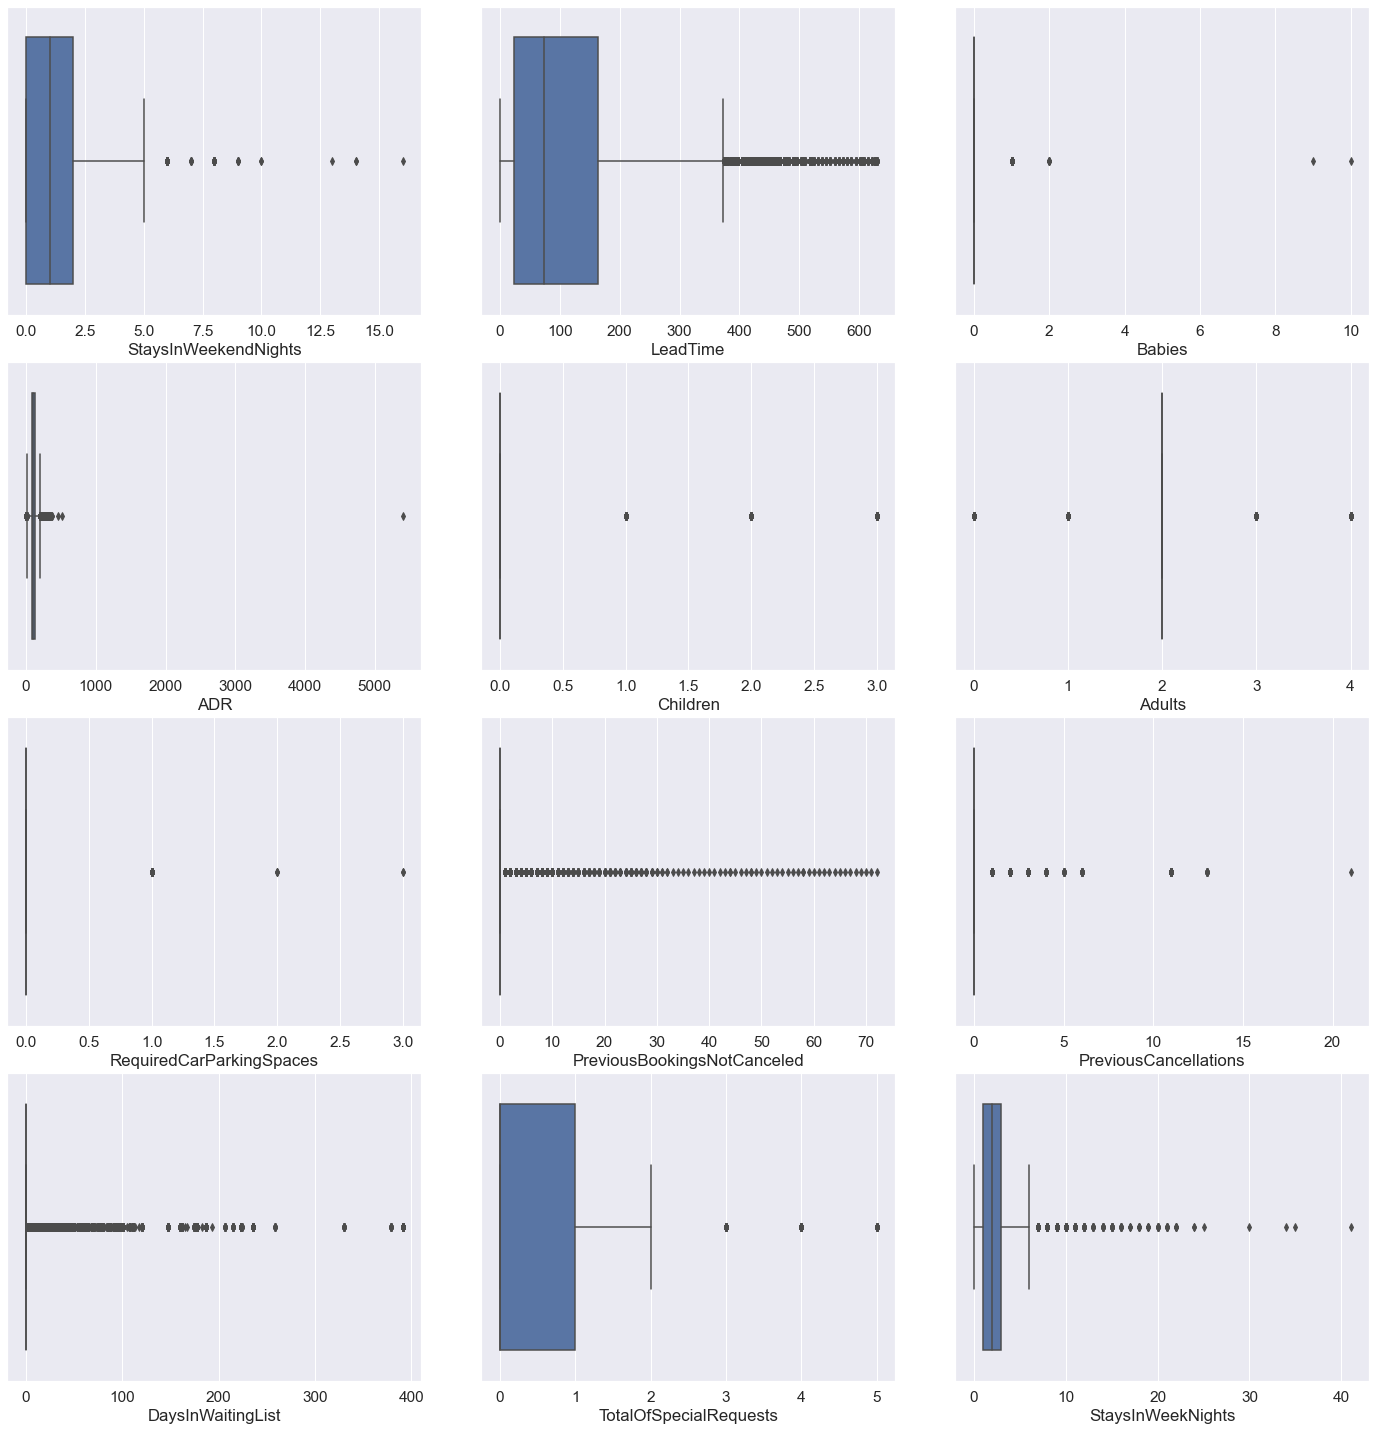

In [112]:
#boxplots to detect outliers
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical_var], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

In [113]:
#drop ghost guests (~100rows)
noguests= df[df.Babies + df.Children + df.Adults == 0].index
df.drop(df.index[noguests], inplace=True)

In [114]:
#Drop customers that didnt stay any night (~260 rows)
nonights = df[df.StaysInWeekendNights + df.StaysInWeekNights == 0].index
df.drop(df.index[nonights], inplace=True)

In [115]:
df.corr()["IsCanceled"].sort_values(ascending = False )

IsCanceled                     1.000000
LeadTime                       0.308856
PreviousCancellations          0.166049
DaysInWaitingList              0.060709
StaysInWeekNights              0.051062
Adults                         0.049315
FamilySize                     0.018942
ArrivalDateWeekNumber          0.001631
ArrivalDateYear               -0.003263
ArrivalDateDayOfMonth         -0.004487
StaysInWeekendNights          -0.006638
ADR                           -0.014765
Children                      -0.027520
Babies                        -0.030249
PreviousBookingsNotCanceled   -0.053364
IsRepeatedGuest               -0.064097
RequiredCarParkingSpaces      -0.133533
BookingChanges                -0.150328
TotalOfSpecialRequests        -0.294582
Name: IsCanceled, dtype: float64

In [116]:
df.RequiredCarParkingSpaces.value_counts()
#Only 5 cases with more than 1 car. These records wont affect the final result, so they can be dropped
df = df[df.RequiredCarParkingSpaces<=1]

In [117]:
df#analysing Average Daily Rate
print("Max",df.ADR.max(), "\n", "Min", df.ADR.min(), "\n", "Mean", df.ADR.mean())
#second highest value
df.ADR.value_counts().sort_index(ascending=False)
#Second highest value is 510, lets drop values above
df = df[df.ADR < 520] #1 record
#check lower values
df.ADR.value_counts().sort_index()[:40]
#There are some values with really low ADR. This could mean Staff and other people related to the hotel.
#As such we will drop these "customers" as they dont bring value to our analysis.
print("number of customers who paid less than 20€ for hotel:",df.ADR.value_counts().sort_index()[:20].sum())
df = df[df.ADR > 20] #1284 record from which 1064 are paid 0

Max 5400.0 
 Min 0.0 
 Mean 105.51724769944137
number of customers who paid less than 20€ for hotel: 1284


In [118]:
#Looking into FamilySize, most people travel in groups of 1-4, with few exceptions with 5. 
#There are 2 cases above 10. We will remove these outliers as they may have prejudicial results
#X.FamilySize.value_counts()
#X= X[X.FamilySize <10]

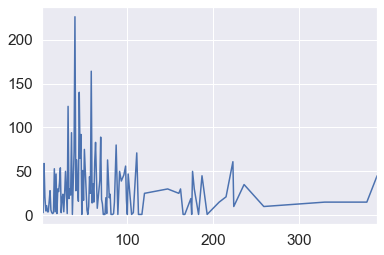

In [119]:
df.DaysInWaitingList[df.DaysInWaitingList>0].value_counts().sort_index().plot()
#Even if we remove 0, the most common ocurrence, people usually stay in waiting list for ~50 days, but it is not uncommon
#to see customers with longer waiting time.

0      2618
1      1723
2      1054
4       987
3       966
       ... 
380       1
387       1
366       1
389       1
347       1
Name: LeadTime, Length: 453, dtype: int64

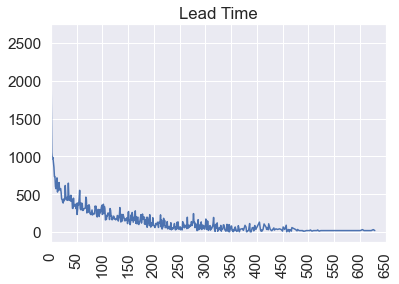

In [120]:
df.PreviousCancellations.value_counts()
#People usually dont have previous cancellations as most of them are new customers. Bin? 0,1+

df.TotalOfSpecialRequests.value_counts()
#No requests most common, then one request. Having more than 2 is also pretty common.Bin? 0,1,2+

df.BookingChanges.value_counts()
#No changes is most common. Having 1 or 2 changes also happen. Bin? 0, 1, 2+

df.LeadTime.value_counts().sort_index().plot(title="Lead Time", xticks = [0,50,100,150,200,250,300,350,400,450,500,550,600,650], rot=90)
df.LeadTime.value_counts()
#Several types of customers,depending on their booking time... No real outliers. Bin?


## Feature Preparation/Engineering

In [121]:
# Check the cancellation ratio:

def cancellation_ratio (feature):
    can = df[df.IsCanceled == 1][[feature,"IsCanceled"]].groupby([feature]).count()
    ncan = df[df.IsCanceled == 0][[feature,"IsCanceled"]].groupby([feature]).count()
    can_ratio = pd.merge(left=can,right=ncan,on=feature,suffixes=('=1', '=0'))
    can_ratio["cancelRatio"]=can_ratio["IsCanceled=1"]/(can_ratio["IsCanceled=0"]+can_ratio["IsCanceled=1"])
    can_ratio.sort_values(by='cancelRatio')
    return can_ratio

In [122]:
#ADR binned regarding the bins from booking.com
df["ADRBinned"] = df.ADR.apply(lambda x: '0-19' if x>=0 and x<20 else 
                                         ('20-50' if x>=20 and x<51 else
                                          ('51-100' if x>=51 and x<101 else
                                           ('101-150' if x>=101 and x<151 else
                                            ('151-200' if x>=151 and x<201 else '200+')))))

#StaysInWeekendNights and StaysInWeekNights binning into total nights
#2-3     42807
#4-7     21672
#1       13272
#8-30     1241
#30+       338

df["totalNights"]=df.StaysInWeekendNights + df.StaysInWeekNights

df["totalNightsBinned"] = df.totalNights.apply(lambda x: '1' if x==1 else 
                                         ('2-3' if x>=2 and x<4 else
                                          ('4-7' if x>=4 and x<8 else
                                           ('8-30' if x>=8 and x<31 else '30+'))))

#Agent binning by cancellation ration higher 50 percent
ratio=cancellation_ratio("Agent")
df = df.merge(ratio, left_on=["Agent"], right_on=["Agent"], how='left') 
df["AgentBinned"] = df.cancelRatio.apply(lambda x: 'Above50PercCanceled' if x>0.5 else 'Below50PercCanceled')
df.drop(columns=["IsCanceled=1","IsCanceled=0","cancelRatio"], inplace=True)

#MarketSegment binning by cancellation ratio 

#Aviation         0.219409
#Complementary    0.118081
#Corporate        0.214668
#Direct           0.173314
#Groups           0.688587
#Offline TA/TO    0.428316
#Online TA        0.373981

ratio=cancellation_ratio("MarketSegment")
df = df.merge(ratio, left_on=["MarketSegment"], right_on=["MarketSegment"], how='left') 
df["MarketSegmentBinned"] = df.cancelRatio.apply(lambda x: 'Above25PercCanceled' if x>0.25 else 'Below25PercCanceled')
df.drop(columns=["IsCanceled=1","IsCanceled=0","cancelRatio"], inplace=True)

#LeadTime binning
#31-120     28244
#121-365    25020
#8-30       12554
#0-7        10808
#366+        2704

df["LeadTimeBinned"] = df.LeadTime.apply(lambda x: '0-7' if x>=0 and x<8 else 
                                         ('8-30' if x>=8 and x<31 else 
                                          ('31-120' if x>=31 and x<121 else
                                           ('121-365' if x>=121 and x<366 else '366+'))))

#ArrivalDateMonth binning
#divided into below and above average cancellation (41.7 %)

#1    42743
#0    36587

#Cancellation Ratio: 
#April        0.463235
#August       0.400980
#December     0.421104
#February     0.382880
#January      0.396681
#July         0.408754
#June         0.446922
#March        0.369464
#May          0.443756
#November     0.381226
#October      0.429717
#September    0.420270

ratio=cancellation_ratio("ArrivalDateMonth")
df = df.merge(ratio, left_on=["ArrivalDateMonth"], right_on=["ArrivalDateMonth"], how='left') 
df["ArrivalDateMonth>avgCancel"] = df.cancelRatio.apply(lambda x: '1' if x>0.417 else '0')
df.drop(columns=["IsCanceled=1","IsCanceled=0","cancelRatio"], inplace=True) 


#binning by season (peak, winter and spring) 
#PeakSeason      32365
#WinterSeason    24795
#SpringSeason    22170
df["ArrivalDateMonthSeason"] = df.ArrivalDateMonth.apply(lambda x: 'PeakSeason' if x in ["June","July","August","September"] else
                                                         ('WinterSeason'if x in ["October","November","December","January","February"] else 
                                                         'SpringSeason'))

#BookingChanges binning (dummy)
#0    69062
#1    10268
df["BookingChangesBinned"] = df.BookingChanges.apply(lambda x: '1' if x>=1 else '0')

#RequiredCarParkingSpaces binning (dummy)
#0    77404
#1     1926
df["RequiredCarParkingSpacesBinned"] = df.RequiredCarParkingSpaces.apply(lambda x: '1' if x>=1 else '0')

#TotalOfSpecialRequests binning (dummy)
#0    47957
#1    31373
df["TotalOfSpecialRequestsBinned"] = df.TotalOfSpecialRequests.apply(lambda x: '1' if x>=1 else '0')

#Company binned
#0    75641
#1     3689
df["CompanyBinned"] = df.Company.apply(lambda x: '1' if x!="       NULL" else '0')

#Children binning (into hasChildren)
#0    74224
#1     5106
df["hasChildren"] = df.Children.apply(lambda x: '1' if x>=1 else '0')

#CustomerType binning (transient+contract and rest)
#1    61704
#0    17626
df["transientAndContract"] = df.CustomerType.apply(lambda x: '1' if x=="Transient" or x=="Contract" else '0')

#DaysInWaitingList
#0        75887
#31-90     2042
#90+        843
#1-30       558
df["DaysInWaitingListBinned"] = df.DaysInWaitingList.apply(lambda x: '0' if x==0 else 
                                         ('1-30' if x>=1 and x<31 else 
                                           ('31-90' if x>=31 and x<91 else '90+')))

In [123]:
le = preprocessing.LabelEncoder()
df['ADR_encoded'] = le.fit_transform(df['ADRBinned'])

#define encoder
status_ohe = OneHotEncoder()

#apply encoder
ARD = status_ohe.fit_transform(df.ADR_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_ARD = pd.DataFrame(ARD, 
                                       columns= ["ADR" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_ARD], axis=1)

#Ordinal Encoder to make sure the order it's correct
ordinalencoder = OrdinalEncoder()
ordinalencoder.fit_transform(df[['ADRBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['ADRBinned'], categories=['0-19','20-50','51-100','101-150','151-200','200+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['ADR_encoded'] = labels


In [124]:
df['nights_encoded'] = le.fit_transform(df['totalNightsBinned'])

#apply encoder
Nights = status_ohe.fit_transform(df.nights_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_Ni = pd.DataFrame(Nights, 
                                       columns= ["Nights" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_Ni], axis=1)

ordinalencoder.fit_transform(df[['totalNightsBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['totalNightsBinned'], categories=['1','2-3', '4-7', '8-30','30+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['nights_encoded'] = labels


In [125]:
df['leadtime_encoded'] = le.fit_transform(df['LeadTimeBinned'])

#apply encoder
Lead = status_ohe.fit_transform(df.leadtime_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_LT = pd.DataFrame(Lead, 
                                       columns= ["LeadTime" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_LT], axis=1)

ordinalencoder.fit_transform(df[['LeadTimeBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['LeadTimeBinned'], categories=['0-7', '8-30', '31-120', '121-365', '366+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['leadtime_encoded'] = labels

In [126]:
df['agent_encoded'] = le.fit_transform(df['AgentBinned'])

#apply encoder
Agent = status_ohe.fit_transform(df.agent_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_A = pd.DataFrame(Agent, 
                                       columns= ["Agent" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_A], axis=1)

df = df.drop(columns =['agent_encoded'])

In [127]:
df['market_encoded'] = le.fit_transform(df['MarketSegmentBinned'])

#apply encoder
Market = status_ohe.fit_transform(df.market_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_M = pd.DataFrame(Agent, 
                                       columns= ["Market" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_M], axis=1)

df = df.drop(columns =['market_encoded'])

In [128]:
df['season_encoded'] = le.fit_transform(df['ArrivalDateMonthSeason'])

#apply encoder
Season = status_ohe.fit_transform(df.season_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_S = pd.DataFrame(Season, 
                                       columns= ["Season" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_S], axis=1)

df = df.drop(columns =['season_encoded'])

In [129]:
df['daysWaiting_encoded'] = le.fit_transform(df['DaysInWaitingListBinned'])

#apply encoder
Waiting = status_ohe.fit_transform(df.daysWaiting_encoded.values.reshape(-1,1)).toarray()

my_data_to_label_OneHot_DW = pd.DataFrame(Waiting, 
                                       columns= ["DaysWaiting" +str(i) for i in (le.classes_)])
#columns= ["status"+str(int(i)) for i in range(Status.shape[1])]
df = pd.concat([df, my_data_to_label_OneHot_DW], axis=1)

ordinalencoder.fit_transform(df[['DaysInWaitingListBinned']])

# Using pandas factorize method for ordinal data
categories = pd.Categorical(df['DaysInWaitingListBinned'], categories=['0', '1-30', '31-90', '90+'], ordered=True)
# Order of labels set for data
# Factorizing the column data
labels, unique = pd.factorize(categories, sort=True)
df['daysWaiting_encoded'] = labels

In [130]:
# Change dtype of some columns to int 
df.BookingChangesBinned = df.BookingChangesBinned.astype(int)
df.RequiredCarParkingSpacesBinned = df.RequiredCarParkingSpacesBinned.astype(int)
df.TotalOfSpecialRequestsBinned = df.TotalOfSpecialRequestsBinned.astype(int)
df.CompanyBinned = df.CompanyBinned.astype(int)
df.hasChildren = df.hasChildren.astype(int)
df.transientAndContract = df.transientAndContract.astype(int)

# Modeling
Our modeling part consist of three iterations. We start with two initial feature sets and test them with different algorithms and different parameter combinations. In the next step we focus on the best performing models and combinations and try two new feature sets. Finally, we tune the best performing model.

These are the base algorithms which we test with different feature sets are: 
* Logistic Regression
* Random Forest
* Gradient Boosting
* Multi Layer Perceptron 
* XGBoost

In the following cells we created some function which we will reuse in the model selection iterations.

In [ ]:
# Each of these functions runs an algortihm with the function parameter as model hyperparameter and returns a Dataframe with 
# "Accuracy", "Precision", "Recall", "F1" metrics as index and model version name as column.

def run_log_regression(solver, max_iter,C):
    logistic_regression= LogisticRegression(solver=solver,max_iter= max_iter,C=C, random_state=1)
    logistic_regression.fit(X_train,y_train)
    y_pred=logistic_regression.predict(X_test)
    results = pd.DataFrame()
    model_version = "logreg_"+"solv" + solver +"_mi" + str(max_iter) + "_C" + str(C*10).split(".")[0]
    results[model_version] = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.f1_score(y_test, y_pred)]
    results.index = ["Accuracy", "Precision", "Recall", "F1"]
    return results  

def run_random_forest(n_estimators, criterion, min_samples_split):
    clf=RandomForestClassifier(n_estimators=n_estimators,criterion=criterion, min_samples_split= min_samples_split,verbose=1,random_state=1)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    results = pd.DataFrame()
    model_version = "rf_n=" + str(n_estimators) + "_c" + str(criterion)+ "_mss" + str(min_samples_split)
    results[model_version] = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.f1_score(y_test, y_pred)]
    results.index = ["Accuracy", "Precision", "Recall", "F1"]
    return results

def run_gradient_boosting(n_estimators, learning_rate, max_leaf_nodes):
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate,max_leaf_nodes=max_leaf_nodes,verbose=1,random_state=1)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    results = pd.DataFrame()
    model_version = "gb_n=" + str(n_estimators) + "_lr" + str(learning_rate)+ "_mlf" + str(max_leaf_nodes)
    results[model_version] = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.f1_score(y_test, y_pred)]
    results.index = ["Accuracy", "Precision", "Recall", "F1"]
    return results   
    
def run_mlp(hidden_layer_sizes, activation, max_iter, alpha):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,activation=activation,max_iter=max_iter, alpha=alpha,solver='adam', #for smaller datasets 'lbfgs' may be better
                        verbose=True,random_state=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results = pd.DataFrame()
    model_version = "mlp_hls" + str(hidden_layer_sizes) + "_af" + str(activation)+ "_mi" + str(max_iter) + "_a" + str(alpha)
    results[model_version] = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.f1_score(y_test, y_pred)]
    results.index = ["Accuracy", "Precision", "Recall", "F1"]
    return results
 
def run_xgboost(max_depth, n_estimators, learning_rate, reg_lambda):
    clf = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, reg_lambda=reg_lambda,verbosity=1, random_state=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    results = pd.DataFrame()
    model_version = "xgb_md" + str(max_depth) + "_n" + str(n_estimators)+ "_lr" + str(learning_rate) + "_l" + str(reg_lambda)
    results[model_version] = [metrics.accuracy_score(y_test, y_pred),metrics.precision_score(y_test, y_pred),metrics.recall_score(y_test, y_pred),metrics.f1_score(y_test, y_pred)]
    results.index = ["Accuracy", "Precision", "Recall", "F1"]
    return results

In [ ]:
#Function for splitting the dataset and scaling continous variables
def split_scale(X,y,scale):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
    """StandardScaler, MinMaxScaler or RobustScaler or None, returns X_train, X_test, y_train, y_test"""
    if scale == "RobustScaler":
        robust = RobustScaler().fit(X_train)
        X_train = robust.transform(X_train)
        X_test = robust.transform(X_test)
        return X_train, X_test,y_train,y_test
    elif scale == "MinMaxScaler":
        minmax = MinMaxScaler().fit(X_train)
        X_train = minmax.transform(X_train)
        X_test = minmax.transform(X_test)
        return X_train, X_test,y_train,y_test
    elif scale == "StandardScaler":
        scaler = StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        return X_train, X_test,y_train,y_test
    elif scale == "None":
        return X_train, X_test,y_train,y_test
    else:
        return print("Choose between StandardScaler, MinMaxScaler, RobustScaler or None!")

## First iteration
In the first iteration we run two feature sets (initial_feature_set and mix_features) through the models and make a first evaluation in the end. 

In [ ]:
initial_features_bin = ['PreviousCancellations', 
       'BookingChangesBinned', 'RequiredCarParkingSpacesBinned',
       'TotalOfSpecialRequestsBinned', 'CompanyBinned', 'hasChildren',
       'transientAndContract', 'daysWaiting_encoded',
       'ADR101-150', 'ADR151-200', 'ADR20-50', 'ADR200+', 'ADR51-100',
       'Nights1', 'Nights2-3', 'Nights30+', 'Nights4-7', 'Nights8-30',
       'LeadTime0-7', 'LeadTime121-365', 'LeadTime31-120', 'LeadTime366+',
       'LeadTime8-30',
       'AgentAbove50PercCanceled', 'AgentBelow50PercCanceled',
       'MarketAbove25PercCanceled', 'MarketBelow25PercCanceled',
       'SeasonPeakSeason', 'SeasonSpringSeason', 'SeasonWinterSeason']

mix_features= ['LeadTime','totalNights','hasChildren','TotalOfSpecialRequests','CompanyBinned',
            'transientAndContract','AgentAbove50PercCanceled', 'AgentBelow50PercCanceled',
            'MarketAbove25PercCanceled', 'MarketBelow25PercCanceled', 'DaysInWaitingList',
            'BookingChanges', 'PreviousCancellations', 'RequiredCarParkingSpaces',
            'SeasonPeakSeason', 'SeasonSpringSeason', 'SeasonWinterSeason','ADR']

In [141]:
# Prepare X and y
y = df['IsCanceled']
X = df[mix_features]
#X = df[initial_feature_set]

In [153]:
#Apply split and scaling
X_train, X_test,y_train,y_test = split_scale(X,y,"MinMaxScaler")
X_train = pd.DataFrame(X_train, columns=mix_features)
X_test = pd.DataFrame(X_test, columns=mix_features)

In [67]:
# Logistic Regression
logreg_results = pd.DataFrame()

solver = ["lbfgs", "liblinear"]
max_iters = [100,200,400]
C = [0.5,0.7,1.0]

params_combinations = list(itertools.product(solver, max_iters, C))

for s,mi,c in params_combinations: 
    logreg_results = pd.concat([logreg_results,run_log_regression(s,mi,c)], axis=1)
#logreg_results.to_csv("logreg_results.csv")
logreg_results

logreg_solvlbfgs_mi100_C5  logreg_solvlbfgs_mi100_C7  \
Accuracy                    0.757202                   0.758749   
Precision                   0.756967                   0.758209   
Recall                      0.620563                   0.624002   
F1                          0.682011                   0.684590   

           logreg_solvlbfgs_mi100_C10  logreg_solvlbfgs_mi200_C5  \
Accuracy                     0.758594                   0.757048   
Precision                    0.758487                   0.756627   
Recall                       0.623019                   0.620563   
F1                           0.684111                   0.681873   

           logreg_solvlbfgs_mi200_C7  logreg_solvlbfgs_mi200_C10  \
Accuracy                    0.758852                    0.758800   
Precision                   0.758127                    0.758631   
Recall                      0.624493                    0.623511   
F1                          0.684852                    0.684466   

           logreg_solvlbfgs_mi400_C5  logreg_solvlbfgs_mi400_C7  \
Accuracy                    0.757048                   0.758800   
Precision                   0.756627                   0.758091   
Recall                      0.620563                   0.624370   
F1                          0.681873                   0.684764   

           logreg_solvlbfgs_mi400_C10  logreg_solvliblinear_mi100_C5  \
Accuracy                     0.758800                       0.756996   
Precision                    0.758631                       0.756437   
Recall                       0.623511                       0.620685   
F1                           0.684466                       0.681870   

           logreg_solvliblinear_mi100_C7  logreg_solvliblinear_mi100_C10  \
Accuracy                        0.758800                        0.758800   
Precision                       0.758091                        0.758476   
Recall                          0.624370                        0.623756   
F1                              0.684764                        0.684551   

           logreg_solvliblinear_mi200_C5  logreg_solvliblinear_mi200_C7  \
Accuracy                        0.756996                       0.758800   
Precision                       0.756437                       0.758091   
Recall                          0.620685                       0.624370   
F1                              0.681870                       0.684764   

           logreg_solvliblinear_mi200_C10  logreg_solvliblinear_mi400_C5  \
Accuracy                         0.758800                       0.756996   
Precision                        0.758476                       0.756437   
Recall                           0.623756                       0.620685   
F1                               0.684551                       0.681870   

           logreg_solvliblinear_mi400_C7  logreg_solvliblinear_mi400_C10  
Accuracy                        0.758800                        0.758800  
Precision                       0.758091                        0.758476  
Recall                          0.624370                        0.623756  
F1                              0.684764                        0.684551

In [68]:
# Random Forest
rf_results = pd.DataFrame()

n_trees = [100, 200, 300]
criterion = ["gini", "entropy"]
mss = [2, 5, 10, 15]

params_combinations = list(itertools.product(n_trees, criterion, mss))

for n,c,m in params_combinations: 
    rf_results = pd.concat([rf_results, run_random_forest(n,c,m)], axis=1)
#rf_results.to_csv("rf_results.csv")
rf_results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

rf_n=100_cgini_mss2  rf_n=100_cgini_mss5  rf_n=100_cgini_mss10  \
Accuracy              0.837293             0.840076              0.839458   
Precision             0.827378             0.839122              0.846239   
Recall                0.773615             0.765631              0.754453   
F1                    0.799594             0.800694              0.797714   

           rf_n=100_cgini_mss15  rf_n=100_centropy_mss2  \
Accuracy               0.837087                0.838427   
Precision              0.847183                0.829516   
Recall                 0.746346                0.773984   
F1                     0.793574                0.800788   

           rf_n=100_centropy_mss5  rf_n=100_centropy_mss10  \
Accuracy                 0.839767                 0.839509   
Precision                0.838081                 0.845879   
Recall                   0.766122                 0.755067   
F1                       0.800488                 0.797897   

           rf_n=100_centropy_mss15  rf_n=200_cgini_mss2  rf_n=200_cgini_mss5  \
Accuracy                  0.837293             0.837139             0.840540   
Precision                 0.847656             0.828259             0.840415   
Recall                    0.746346             0.771895             0.765262   
F1                        0.793781             0.799084             0.801080   

           ...  rf_n=200_centropy_mss10  rf_n=200_centropy_mss15  \
Accuracy   ...                 0.838427                 0.837448   
Precision  ...                 0.845241                 0.848595   
Recall     ...                 0.752733                 0.745609   
F1         ...                 0.796310                 0.793775   

           rf_n=300_cgini_mss2  rf_n=300_cgini_mss5  rf_n=300_cgini_mss10  \
Accuracy              0.837602             0.840386              0.840076   
Precision             0.828895             0.840259              0.848409   
Recall                0.772387             0.765017              0.753470   
F1                    0.799644             0.800874              0.798126   

           rf_n=300_cgini_mss15  rf_n=300_centropy_mss2  \
Accuracy               0.836778                0.837345   
Precision              0.847638                0.828176   
Recall                 0.744872                0.772632   
F1                     0.792939                0.799441   

           rf_n=300_centropy_mss5  rf_n=300_centropy_mss10  \
Accuracy                 0.840128                 0.839561   
Precision                0.839418                 0.846950   
Recall                   0.765385                 0.753839   
F1                       0.800694                 0.797686   

           rf_n=300_centropy_mss15  
Accuracy                  0.837602  
Precision                 0.849244  
Recall                    0.745240  
F1                        0.793850  

[4 rows x 24 columns]

In [70]:
# Gradient Boosting 
gb_results = pd.DataFrame()

n_trees =  [100, 200, 300]
lrs = [0.05, 0.1, 0.3]
mln = [8, 16, 24, 32]

params_combinations = list(itertools.product(n_trees, lrs, mln))

for n,l,m in params_combinations: 
    gb_results = pd.concat([gb_results,run_gradient_boosting(n,l,m)], axis=1)
#gb_results.to_csv("gb_results.csv")
gb_results

      Iter       Train Loss   Remaining Time 
         1           1.3393            4.84s
         2           1.3175            4.50s
         3           1.2979            4.30s
         4           1.2792            4.42s
         5           1.2622            4.50s
         6           1.2461            4.30s
         7           1.2269            4.16s
         8           1.2133            3.97s
         9           1.1968            3.95s
        10           1.1816            3.90s
        20           1.0827            3.31s
        30           1.0266            2.89s
        40           0.9889            2.46s
        50           0.9622            2.03s
        60           0.9437            1.61s
        70           0.9290            1.20s
        80           0.9177            0.78s
        90           0.9082            0.39s
       100           0.9013            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3393            4.99s
        

         3           1.0884            4.07s
         4           1.0435            3.92s
         5           1.0145            4.04s
         6           0.9925            3.84s
         7           0.9716            3.81s
         8           0.9577            3.77s
         9           0.9443            3.71s
        10           0.9342            3.59s
        20           0.8855            3.06s
        30           0.8628            2.63s
        40           0.8488            2.25s
        50           0.8408            1.83s
        60           0.8349            1.45s
        70           0.8264            1.08s
        80           0.8208            0.71s
        90           0.8138            0.35s
       100           0.8061            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2373            4.27s
         2           1.1618            4.02s
         3           1.0884            4.01s
         4           1.0435            3.90s
         

       200           0.8319            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3164           10.19s
         2           1.2784           10.13s
         3           1.2448            9.40s
         4           1.2153            8.55s
         5           1.1822            8.67s
         6           1.1546            8.45s
         7           1.1311            8.12s
         8           1.1139            8.17s
         9           1.0954            7.96s
        10           1.0814            7.91s
        20           0.9857            7.25s
        30           0.9414            6.65s
        40           0.9153            6.17s
        50           0.8997            5.69s
        60           0.8880            5.28s
        70           0.8794            4.87s
        80           0.8718            4.53s
        90           0.8661            4.10s
       100           0.8616            3.70s
       200           0.8319            0.00s
      Ite

        20           1.0827           11.59s
        30           1.0266           11.06s
        40           0.9889           10.57s
        50           0.9622           10.02s
        60           0.9437            9.55s
        70           0.9290            9.05s
        80           0.9177            8.54s
        90           0.9082            8.11s
       100           0.9013            7.66s
       200           0.8633            3.72s
       300           0.8462            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.3393           14.55s
         2           1.3175           14.54s
         3           1.2979           14.07s
         4           1.2792           13.99s
         5           1.2622           13.27s
         6           1.2461           13.31s
         7           1.2269           13.27s
         8           1.2133           13.00s
         9           1.1968           12.30s
        10           1.1816           12.35s
        2

        80           0.8208            7.76s
        90           0.8138            7.38s
       100           0.8061            7.07s
       200           0.7683            3.48s
       300           0.7462            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2373           12.08s
         2           1.1618           13.31s
         3           1.0884           11.27s
         4           1.0435           11.73s
         5           1.0145           12.12s
         6           0.9925           11.60s
         7           0.9716           11.49s
         8           0.9577           12.67s
         9           0.9443           12.12s
        10           0.9342           12.23s
        20           0.8855           11.74s
        30           0.8628           10.69s
        40           0.8488            9.92s
        50           0.8408            9.22s
        60           0.8349            8.69s
        70           0.8264            8.25s
        8

gb_n=100_lr0.05_mlf8  gb_n=100_lr0.05_mlf16  gb_n=100_lr0.05_mlf24  \
Accuracy               0.783178               0.783178               0.783178   
Precision              0.804867               0.804867               0.804867   
Recall                 0.637882               0.637882               0.637882   
F1                     0.711711               0.711711               0.711711   

           gb_n=100_lr0.05_mlf32  gb_n=100_lr0.1_mlf8  gb_n=100_lr0.1_mlf16  \
Accuracy                0.783178             0.790445              0.790445   
Precision               0.804867             0.808012              0.808012   
Recall                  0.637882             0.656553              0.656553   
F1                      0.711711             0.724451              0.724451   

           gb_n=100_lr0.1_mlf24  gb_n=100_lr0.1_mlf32  gb_n=100_lr0.3_mlf8  \
Accuracy               0.790445              0.790445             0.806525   
Precision              0.808012              0.808012             0.828221   
Recall                 0.656553              0.656553             0.679892   
F1                     0.724451              0.724451             0.746762   

           gb_n=100_lr0.3_mlf16  ...  gb_n=300_lr0.05_mlf24  \
Accuracy               0.806525  ...               0.796784   
Precision              0.828221  ...               0.819482   
Recall                 0.679892  ...               0.661344   
F1                     0.746762  ...               0.731969   

           gb_n=300_lr0.05_mlf32  gb_n=300_lr0.1_mlf8  gb_n=300_lr0.1_mlf16  \
Accuracy                0.796784             0.806009              0.806009   
Precision               0.819482             0.826106              0.826106   
Recall                  0.661344             0.680997              0.680997   
F1                      0.731969             0.746566              0.746566   

           gb_n=300_lr0.1_mlf24  gb_n=300_lr0.1_mlf32  gb_n=300_lr0.3_mlf8  \
Accuracy               0.806009              0.806009             0.812039   
Precision              0.826106              0.826106             0.827265   
Recall                 0.680997              0.680997             0.697703   
F1                     0.746566              0.746566             0.756980   

           gb_n=300_lr0.3_mlf16  gb_n=300_lr0.3_mlf24  gb_n=300_lr0.3_mlf32  
Accuracy               0.812039              0.812039              0.812039  
Precision              0.827265              0.827265              0.827265  
Recall                 0.697703              0.697703              0.697703  
F1                     0.756980              0.756980              0.756980  

[4 rows x 36 columns]

In [75]:
# Neural Network - Multi Layer Perceptron
mlp_results = pd.DataFrame()

afs = ["logistic", "relu", "tanh"]
alphas = [0.0001, 0.0005, 0.001]
max_iters = [100, 200, 300]
number_nodes = round((2/3)*len(X.columns.values)) + 2
hls = [(number_nodes,number_nodes),(number_nodes,number_nodes,number_nodes),(number_nodes,number_nodes-1,number_nodes-2)]

params_combinations = list(itertools.product(afs, alphas, max_iters, hls))

for af,a,mi,h in params_combinations: 
    mlp_results = pd.concat([mlp_results, run_mlp(h,af,mi,a)], axis=1)
#mlp_results.to_csv("mlp_results.csv")
mlp_results

Iteration 1, loss = 0.67157352
Iteration 2, loss = 0.61271986
Iteration 3, loss = 0.55206724
Iteration 4, loss = 0.51924543
Iteration 5, loss = 0.51089186
Iteration 6, loss = 0.50715983
Iteration 7, loss = 0.50447387
Iteration 8, loss = 0.50252491
Iteration 9, loss = 0.50097875
Iteration 10, loss = 0.49961044
Iteration 11, loss = 0.49850191
Iteration 12, loss = 0.49770153
Iteration 13, loss = 0.49666511
Iteration 14, loss = 0.49576558
Iteration 15, loss = 0.49509380
Iteration 16, loss = 0.49458902
Iteration 17, loss = 0.49389078
Iteration 18, loss = 0.49337355
Iteration 19, loss = 0.49269214
Iteration 20, loss = 0.49216858
Iteration 21, loss = 0.49160422
Iteration 22, loss = 0.49107234
Iteration 23, loss = 0.49045824
Iteration 24, loss = 0.48998469
Iteration 25, loss = 0.48948292
Iteration 26, loss = 0.48894450
Iteration 27, loss = 0.48823973
Iteration 28, loss = 0.48779622
Iteration 29, loss = 0.48741182
Iteration 30, loss = 0.48690650
Iteration 31, loss = 0.48630035
Iteration 32, los

Iteration 11, loss = 0.49587144
Iteration 12, loss = 0.49562831
Iteration 13, loss = 0.49450831
Iteration 14, loss = 0.49375621
Iteration 15, loss = 0.49335805
Iteration 16, loss = 0.49302788
Iteration 17, loss = 0.49260367
Iteration 18, loss = 0.49189799
Iteration 19, loss = 0.49170693
Iteration 20, loss = 0.49100893
Iteration 21, loss = 0.49060092
Iteration 22, loss = 0.49061782
Iteration 23, loss = 0.48989332
Iteration 24, loss = 0.49000297
Iteration 25, loss = 0.48935037
Iteration 26, loss = 0.48918402
Iteration 27, loss = 0.48880878
Iteration 28, loss = 0.48854620
Iteration 29, loss = 0.48797297
Iteration 30, loss = 0.48820837
Iteration 31, loss = 0.48748535
Iteration 32, loss = 0.48736837
Iteration 33, loss = 0.48722838
Iteration 34, loss = 0.48685058
Iteration 35, loss = 0.48677999
Iteration 36, loss = 0.48620183
Iteration 37, loss = 0.48610518
Iteration 38, loss = 0.48598831
Iteration 39, loss = 0.48580939
Iteration 40, loss = 0.48556646
Iteration 41, loss = 0.48547917
Iteratio

Iteration 70, loss = 0.47990676
Iteration 71, loss = 0.47945538
Iteration 72, loss = 0.47920553
Iteration 73, loss = 0.47886007
Iteration 74, loss = 0.47856166
Iteration 75, loss = 0.47828674
Iteration 76, loss = 0.47837160
Iteration 77, loss = 0.47788961
Iteration 78, loss = 0.47758707
Iteration 79, loss = 0.47799572
Iteration 80, loss = 0.47734214
Iteration 81, loss = 0.47747303
Iteration 82, loss = 0.47743590
Iteration 83, loss = 0.47664765
Iteration 84, loss = 0.47641427
Iteration 85, loss = 0.47650384
Iteration 86, loss = 0.47607584
Iteration 87, loss = 0.47605192
Iteration 88, loss = 0.47569700
Iteration 89, loss = 0.47566159
Iteration 90, loss = 0.47508504
Iteration 91, loss = 0.47480780
Iteration 92, loss = 0.47461522
Iteration 93, loss = 0.47447056
Iteration 94, loss = 0.47404914
Iteration 95, loss = 0.47386834
Iteration 96, loss = 0.47373648
Iteration 97, loss = 0.47361414
Iteration 98, loss = 0.47305200
Iteration 99, loss = 0.47330724
Iteration 100, loss = 0.47268181
Iterati

Iteration 123, loss = 0.46142226
Iteration 124, loss = 0.46135984
Iteration 125, loss = 0.46138644
Iteration 126, loss = 0.46126471
Iteration 127, loss = 0.46114704
Iteration 128, loss = 0.46116751
Iteration 129, loss = 0.46086354
Iteration 130, loss = 0.46093449
Iteration 131, loss = 0.46097335
Iteration 132, loss = 0.46064183
Iteration 133, loss = 0.46066573
Iteration 134, loss = 0.46055577
Iteration 135, loss = 0.46053406
Iteration 136, loss = 0.46038374
Iteration 137, loss = 0.46035470
Iteration 138, loss = 0.46012351
Iteration 139, loss = 0.46036944
Iteration 140, loss = 0.46027993
Iteration 141, loss = 0.46006132
Iteration 142, loss = 0.46005452
Iteration 143, loss = 0.45975805
Iteration 144, loss = 0.45978062
Iteration 145, loss = 0.45983427
Iteration 146, loss = 0.45978920
Iteration 147, loss = 0.45955429
Iteration 148, loss = 0.45943115
Iteration 149, loss = 0.45955023
Iteration 150, loss = 0.45931775
Iteration 151, loss = 0.45935250
Iteration 152, loss = 0.45935381
Iteration 

Iteration 131, loss = 0.46503732
Iteration 132, loss = 0.46476398
Iteration 133, loss = 0.46478874
Iteration 134, loss = 0.46434320
Iteration 135, loss = 0.46429748
Iteration 136, loss = 0.46401252
Iteration 137, loss = 0.46364749
Iteration 138, loss = 0.46362497
Iteration 139, loss = 0.46331573
Iteration 140, loss = 0.46351994
Iteration 141, loss = 0.46316621
Iteration 142, loss = 0.46279206
Iteration 143, loss = 0.46279798
Iteration 144, loss = 0.46268477
Iteration 145, loss = 0.46216584
Iteration 146, loss = 0.46226112
Iteration 147, loss = 0.46216192
Iteration 148, loss = 0.46199410
Iteration 149, loss = 0.46164126
Iteration 150, loss = 0.46192364
Iteration 151, loss = 0.46190413
Iteration 152, loss = 0.46144512
Iteration 153, loss = 0.46110466
Iteration 154, loss = 0.46122165
Iteration 155, loss = 0.46094013
Iteration 156, loss = 0.46085427
Iteration 157, loss = 0.46050740
Iteration 158, loss = 0.46033591
Iteration 159, loss = 0.46060984
Iteration 160, loss = 0.46024284
Iteration 

Iteration 92, loss = 0.46669294
Iteration 93, loss = 0.46686892
Iteration 94, loss = 0.46638145
Iteration 95, loss = 0.46651900
Iteration 96, loss = 0.46617285
Iteration 97, loss = 0.46593142
Iteration 98, loss = 0.46602967
Iteration 99, loss = 0.46614379
Iteration 100, loss = 0.46595954
Iteration 1, loss = 0.67748577
Iteration 2, loss = 0.61475810
Iteration 3, loss = 0.53228118
Iteration 4, loss = 0.51068211
Iteration 5, loss = 0.50581038
Iteration 6, loss = 0.50317558
Iteration 7, loss = 0.50107782
Iteration 8, loss = 0.49967608
Iteration 9, loss = 0.49859825
Iteration 10, loss = 0.49772970
Iteration 11, loss = 0.49652118
Iteration 12, loss = 0.49631018
Iteration 13, loss = 0.49522261
Iteration 14, loss = 0.49450048
Iteration 15, loss = 0.49412982
Iteration 16, loss = 0.49383087
Iteration 17, loss = 0.49343379
Iteration 18, loss = 0.49275443
Iteration 19, loss = 0.49259829
Iteration 20, loss = 0.49192978
Iteration 21, loss = 0.49155732
Iteration 22, loss = 0.49160715
Iteration 23, lo

Iteration 50, loss = 0.47720651
Iteration 51, loss = 0.47661661
Iteration 52, loss = 0.47602954
Iteration 53, loss = 0.47563334
Iteration 54, loss = 0.47516127
Iteration 55, loss = 0.47467446
Iteration 56, loss = 0.47403635
Iteration 57, loss = 0.47367436
Iteration 58, loss = 0.47334483
Iteration 59, loss = 0.47306393
Iteration 60, loss = 0.47256625
Iteration 61, loss = 0.47222694
Iteration 62, loss = 0.47194838
Iteration 63, loss = 0.47154265
Iteration 64, loss = 0.47116769
Iteration 65, loss = 0.47111320
Iteration 66, loss = 0.47081386
Iteration 67, loss = 0.47032078
Iteration 68, loss = 0.47031361
Iteration 69, loss = 0.47007726
Iteration 70, loss = 0.47006010
Iteration 71, loss = 0.46955372
Iteration 72, loss = 0.46948869
Iteration 73, loss = 0.46962794
Iteration 74, loss = 0.46888258
Iteration 75, loss = 0.46886353
Iteration 76, loss = 0.46880825
Iteration 77, loss = 0.46846890
Iteration 78, loss = 0.46832554
Iteration 79, loss = 0.46831697
Iteration 80, loss = 0.46810095
Iteratio

Iteration 104, loss = 0.46818570
Iteration 105, loss = 0.46804421
Iteration 106, loss = 0.46775805
Iteration 107, loss = 0.46760157
Iteration 108, loss = 0.46758566
Iteration 109, loss = 0.46692812
Iteration 110, loss = 0.46690543
Iteration 111, loss = 0.46656562
Iteration 112, loss = 0.46695133
Iteration 113, loss = 0.46640377
Iteration 114, loss = 0.46599893
Iteration 115, loss = 0.46626484
Iteration 116, loss = 0.46574104
Iteration 117, loss = 0.46532177
Iteration 118, loss = 0.46531601
Iteration 119, loss = 0.46495552
Iteration 120, loss = 0.46477484
Iteration 121, loss = 0.46482414
Iteration 122, loss = 0.46436022
Iteration 123, loss = 0.46444985
Iteration 124, loss = 0.46409113
Iteration 125, loss = 0.46419067
Iteration 126, loss = 0.46464955
Iteration 127, loss = 0.46419484
Iteration 128, loss = 0.46344565
Iteration 129, loss = 0.46336194
Iteration 130, loss = 0.46326521
Iteration 131, loss = 0.46302599
Iteration 132, loss = 0.46298730
Iteration 133, loss = 0.46280777
Iteration 

Iteration 161, loss = 0.46291302
Iteration 162, loss = 0.46191877
Iteration 163, loss = 0.46251584
Iteration 164, loss = 0.46199196
Iteration 165, loss = 0.46176099
Iteration 166, loss = 0.46198882
Iteration 167, loss = 0.46159027
Iteration 168, loss = 0.46166285
Iteration 169, loss = 0.46154936
Iteration 170, loss = 0.46143881
Iteration 171, loss = 0.46119788
Iteration 172, loss = 0.46163554
Iteration 173, loss = 0.46084256
Iteration 174, loss = 0.46146026
Iteration 175, loss = 0.46098465
Iteration 176, loss = 0.46105418
Iteration 177, loss = 0.46061776
Iteration 178, loss = 0.46031829
Iteration 179, loss = 0.46098020
Iteration 180, loss = 0.46059494
Iteration 181, loss = 0.46039593
Iteration 182, loss = 0.45997570
Iteration 183, loss = 0.46027544
Iteration 184, loss = 0.46015906
Iteration 185, loss = 0.45974399
Iteration 186, loss = 0.45988485
Iteration 187, loss = 0.45965836
Iteration 188, loss = 0.46010523
Iteration 189, loss = 0.45991087
Iteration 190, loss = 0.45965679
Iteration 

Iteration 213, loss = 0.45846497
Iteration 214, loss = 0.45861941
Iteration 215, loss = 0.45859384
Iteration 216, loss = 0.45857075
Iteration 217, loss = 0.45868366
Iteration 218, loss = 0.45868525
Iteration 219, loss = 0.45849038
Iteration 220, loss = 0.45817800
Iteration 221, loss = 0.45841105
Iteration 222, loss = 0.45802931
Iteration 223, loss = 0.45806925
Iteration 224, loss = 0.45824428
Iteration 225, loss = 0.45820469
Iteration 226, loss = 0.45781328
Iteration 227, loss = 0.45783310
Iteration 228, loss = 0.45837785
Iteration 229, loss = 0.45773637
Iteration 230, loss = 0.45791463
Iteration 231, loss = 0.45814149
Iteration 232, loss = 0.45803936
Iteration 233, loss = 0.45789818
Iteration 234, loss = 0.45753477
Iteration 235, loss = 0.45776231
Iteration 236, loss = 0.45754794
Iteration 237, loss = 0.45751317
Iteration 238, loss = 0.45751600
Iteration 239, loss = 0.45756277
Iteration 240, loss = 0.45726062
Iteration 241, loss = 0.45733469
Iteration 242, loss = 0.45723363
Iteration 

Iteration 8, loss = 0.50123590
Iteration 9, loss = 0.49996568
Iteration 10, loss = 0.49893644
Iteration 11, loss = 0.49787676
Iteration 12, loss = 0.49715871
Iteration 13, loss = 0.49647953
Iteration 14, loss = 0.49585714
Iteration 15, loss = 0.49504936
Iteration 16, loss = 0.49452234
Iteration 17, loss = 0.49404750
Iteration 18, loss = 0.49318801
Iteration 19, loss = 0.49303626
Iteration 20, loss = 0.49245145
Iteration 21, loss = 0.49211473
Iteration 22, loss = 0.49213889
Iteration 23, loss = 0.49146773
Iteration 24, loss = 0.49125887
Iteration 25, loss = 0.49086554
Iteration 26, loss = 0.49065108
Iteration 27, loss = 0.49038941
Iteration 28, loss = 0.49004676
Iteration 29, loss = 0.48971486
Iteration 30, loss = 0.48967262
Iteration 31, loss = 0.48938533
Iteration 32, loss = 0.48919520
Iteration 33, loss = 0.48874893
Iteration 34, loss = 0.48864414
Iteration 35, loss = 0.48865115
Iteration 36, loss = 0.48814175
Iteration 37, loss = 0.48827208
Iteration 38, loss = 0.48810581
Iteration 

Iteration 17, loss = 0.49574158
Iteration 18, loss = 0.49531083
Iteration 19, loss = 0.49471747
Iteration 20, loss = 0.49427988
Iteration 21, loss = 0.49379783
Iteration 22, loss = 0.49334483
Iteration 23, loss = 0.49280605
Iteration 24, loss = 0.49241298
Iteration 25, loss = 0.49198399
Iteration 26, loss = 0.49151581
Iteration 27, loss = 0.49087528
Iteration 28, loss = 0.49050214
Iteration 29, loss = 0.49018689
Iteration 30, loss = 0.48974921
Iteration 31, loss = 0.48919505
Iteration 32, loss = 0.48878976
Iteration 33, loss = 0.48816116
Iteration 34, loss = 0.48777155
Iteration 35, loss = 0.48722478
Iteration 36, loss = 0.48673705
Iteration 37, loss = 0.48629588
Iteration 38, loss = 0.48558808
Iteration 39, loss = 0.48510960
Iteration 40, loss = 0.48470353
Iteration 41, loss = 0.48390981
Iteration 42, loss = 0.48361171
Iteration 43, loss = 0.48298143
Iteration 44, loss = 0.48232470
Iteration 45, loss = 0.48166614
Iteration 46, loss = 0.48147606
Iteration 47, loss = 0.48060411
Iteratio

Iteration 26, loss = 0.49163234
Iteration 27, loss = 0.49134372
Iteration 28, loss = 0.49116683
Iteration 29, loss = 0.49068232
Iteration 30, loss = 0.49101034
Iteration 31, loss = 0.49035701
Iteration 32, loss = 0.49031873
Iteration 33, loss = 0.49021891
Iteration 34, loss = 0.48991566
Iteration 35, loss = 0.48988454
Iteration 36, loss = 0.48934713
Iteration 37, loss = 0.48928015
Iteration 38, loss = 0.48918196
Iteration 39, loss = 0.48901856
Iteration 40, loss = 0.48877466
Iteration 41, loss = 0.48872204
Iteration 42, loss = 0.48854751
Iteration 43, loss = 0.48828429
Iteration 44, loss = 0.48825330
Iteration 45, loss = 0.48776845
Iteration 46, loss = 0.48791182
Iteration 47, loss = 0.48791040
Iteration 48, loss = 0.48723353
Iteration 49, loss = 0.48731372
Iteration 50, loss = 0.48703265
Iteration 51, loss = 0.48663493
Iteration 52, loss = 0.48652734
Iteration 53, loss = 0.48634994
Iteration 54, loss = 0.48582703
Iteration 55, loss = 0.48564817
Iteration 56, loss = 0.48574634
Iteratio

Iteration 137, loss = 0.46501492
Iteration 138, loss = 0.46471037
Iteration 139, loss = 0.46499040
Iteration 140, loss = 0.46490268
Iteration 141, loss = 0.46469811
Iteration 142, loss = 0.46470657
Iteration 143, loss = 0.46432802
Iteration 144, loss = 0.46445848
Iteration 145, loss = 0.46455253
Iteration 146, loss = 0.46447265
Iteration 147, loss = 0.46427788
Iteration 148, loss = 0.46400828
Iteration 149, loss = 0.46420940
Iteration 150, loss = 0.46401468
Iteration 151, loss = 0.46403097
Iteration 152, loss = 0.46409251
Iteration 153, loss = 0.46394194
Iteration 154, loss = 0.46390972
Iteration 155, loss = 0.46377605
Iteration 156, loss = 0.46380354
Iteration 157, loss = 0.46375384
Iteration 158, loss = 0.46344853
Iteration 159, loss = 0.46345665
Iteration 160, loss = 0.46348568
Iteration 161, loss = 0.46341940
Iteration 162, loss = 0.46348419
Iteration 163, loss = 0.46340595
Iteration 164, loss = 0.46336312
Iteration 165, loss = 0.46314290
Iteration 166, loss = 0.46325063
Iteration 

Iteration 180, loss = 0.46228248
Iteration 181, loss = 0.46204715
Iteration 182, loss = 0.46156438
Iteration 183, loss = 0.46189103
Iteration 184, loss = 0.46173280
Iteration 185, loss = 0.46137019
Iteration 186, loss = 0.46147885
Iteration 187, loss = 0.46127361
Iteration 188, loss = 0.46173029
Iteration 189, loss = 0.46160433
Iteration 190, loss = 0.46125967
Iteration 191, loss = 0.46137334
Iteration 192, loss = 0.46103322
Iteration 193, loss = 0.46116958
Iteration 194, loss = 0.46105068
Iteration 195, loss = 0.46112301
Iteration 196, loss = 0.46070465
Iteration 197, loss = 0.46080267
Iteration 198, loss = 0.46109972
Iteration 199, loss = 0.46108194
Iteration 200, loss = 0.46070587
Iteration 201, loss = 0.46071767
Iteration 202, loss = 0.46095804
Iteration 203, loss = 0.46027123
Iteration 204, loss = 0.46036708
Iteration 205, loss = 0.46065465
Iteration 206, loss = 0.45989471
Iteration 207, loss = 0.45987771
Iteration 208, loss = 0.46021492
Iteration 209, loss = 0.45977535
Iteration 

Iteration 91, loss = 0.42840504
Iteration 92, loss = 0.42792338
Iteration 93, loss = 0.42741430
Iteration 94, loss = 0.42787347
Iteration 95, loss = 0.42774368
Iteration 96, loss = 0.42710217
Iteration 97, loss = 0.42764644
Iteration 98, loss = 0.42648277
Iteration 99, loss = 0.42691672
Iteration 100, loss = 0.42663890
Iteration 1, loss = 0.57613458
Iteration 2, loss = 0.49901703
Iteration 3, loss = 0.48829869
Iteration 4, loss = 0.47996251
Iteration 5, loss = 0.47510313
Iteration 6, loss = 0.47088580
Iteration 7, loss = 0.46868838
Iteration 8, loss = 0.46684395
Iteration 9, loss = 0.46527730
Iteration 10, loss = 0.46419821
Iteration 11, loss = 0.46291602
Iteration 12, loss = 0.46255933
Iteration 13, loss = 0.46183927
Iteration 14, loss = 0.46207057
Iteration 15, loss = 0.46055631
Iteration 16, loss = 0.46000221
Iteration 17, loss = 0.45995033
Iteration 18, loss = 0.45790058
Iteration 19, loss = 0.45747626
Iteration 20, loss = 0.45605993
Iteration 21, loss = 0.45532211
Iteration 22, lo

Iteration 147, loss = 0.43507312
Iteration 148, loss = 0.43473388
Iteration 149, loss = 0.43559658
Iteration 150, loss = 0.43520328
Iteration 151, loss = 0.43471124
Iteration 152, loss = 0.43505491
Iteration 153, loss = 0.43537477
Iteration 154, loss = 0.43523030
Iteration 155, loss = 0.43473394
Iteration 156, loss = 0.43496247
Iteration 157, loss = 0.43469628
Iteration 158, loss = 0.43466716
Iteration 159, loss = 0.43460890
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57093478
Iteration 2, loss = 0.49862948
Iteration 3, loss = 0.48790080
Iteration 4, loss = 0.47867826
Iteration 5, loss = 0.47271586
Iteration 6, loss = 0.46921797
Iteration 7, loss = 0.46572172
Iteration 8, loss = 0.46337860
Iteration 9, loss = 0.46225985
Iteration 10, loss = 0.46065845
Iteration 11, loss = 0.45802326
Iteration 12, loss = 0.45791701
Iteration 13, loss = 0.45617066
Iteration 14, loss = 0.45539217
Iteration 15, loss = 0.45489717
Iteration 

Iteration 49, loss = 0.44431837
Iteration 50, loss = 0.44346806
Iteration 51, loss = 0.44415211
Iteration 52, loss = 0.44341998
Iteration 53, loss = 0.44329554
Iteration 54, loss = 0.44188697
Iteration 55, loss = 0.44281445
Iteration 56, loss = 0.44216073
Iteration 57, loss = 0.44125092
Iteration 58, loss = 0.44106769
Iteration 59, loss = 0.44165902
Iteration 60, loss = 0.44093042
Iteration 61, loss = 0.44084243
Iteration 62, loss = 0.44160836
Iteration 63, loss = 0.44070638
Iteration 64, loss = 0.44051110
Iteration 65, loss = 0.44021887
Iteration 66, loss = 0.44008892
Iteration 67, loss = 0.44022387
Iteration 68, loss = 0.43990638
Iteration 69, loss = 0.43969780
Iteration 70, loss = 0.43910896
Iteration 71, loss = 0.44074098
Iteration 72, loss = 0.44008991
Iteration 73, loss = 0.43876390
Iteration 74, loss = 0.43876238
Iteration 75, loss = 0.43993980
Iteration 76, loss = 0.43879427
Iteration 77, loss = 0.43922393
Iteration 78, loss = 0.43865714
Iteration 79, loss = 0.43829018
Iteratio

Iteration 12, loss = 0.45791701
Iteration 13, loss = 0.45617066
Iteration 14, loss = 0.45539217
Iteration 15, loss = 0.45489717
Iteration 16, loss = 0.45393953
Iteration 17, loss = 0.45418448
Iteration 18, loss = 0.45337311
Iteration 19, loss = 0.45315232
Iteration 20, loss = 0.45156872
Iteration 21, loss = 0.45143179
Iteration 22, loss = 0.45130348
Iteration 23, loss = 0.44999893
Iteration 24, loss = 0.45041114
Iteration 25, loss = 0.44948660
Iteration 26, loss = 0.44918636
Iteration 27, loss = 0.44846241
Iteration 28, loss = 0.44780759
Iteration 29, loss = 0.44735577
Iteration 30, loss = 0.44743171
Iteration 31, loss = 0.44656580
Iteration 32, loss = 0.44623797
Iteration 33, loss = 0.44585649
Iteration 34, loss = 0.44462051
Iteration 35, loss = 0.44530205
Iteration 36, loss = 0.44445280
Iteration 37, loss = 0.44415717
Iteration 38, loss = 0.44381537
Iteration 39, loss = 0.44363335
Iteration 40, loss = 0.44290141
Iteration 41, loss = 0.44219343
Iteration 42, loss = 0.44154264
Iteratio

Iteration 76, loss = 0.43879427
Iteration 77, loss = 0.43922393
Iteration 78, loss = 0.43865714
Iteration 79, loss = 0.43829018
Iteration 80, loss = 0.43925693
Iteration 81, loss = 0.44007521
Iteration 82, loss = 0.43857527
Iteration 83, loss = 0.43876458
Iteration 84, loss = 0.43858010
Iteration 85, loss = 0.43825736
Iteration 86, loss = 0.43873939
Iteration 87, loss = 0.43818823
Iteration 88, loss = 0.43810406
Iteration 89, loss = 0.43754694
Iteration 90, loss = 0.43805957
Iteration 91, loss = 0.43800938
Iteration 92, loss = 0.43868973
Iteration 93, loss = 0.43851470
Iteration 94, loss = 0.43727542
Iteration 95, loss = 0.43688371
Iteration 96, loss = 0.43729867
Iteration 97, loss = 0.43818191
Iteration 98, loss = 0.43768975
Iteration 99, loss = 0.43720469
Iteration 100, loss = 0.43691627
Iteration 101, loss = 0.43731764
Iteration 102, loss = 0.43653593
Iteration 103, loss = 0.43651294
Iteration 104, loss = 0.43661665
Iteration 105, loss = 0.43897805
Iteration 106, loss = 0.43644239
I

Iteration 3, loss = 0.48898389
Iteration 4, loss = 0.48262234
Iteration 5, loss = 0.47853801
Iteration 6, loss = 0.47427819
Iteration 7, loss = 0.47132221
Iteration 8, loss = 0.46917188
Iteration 9, loss = 0.46738393
Iteration 10, loss = 0.46599864
Iteration 11, loss = 0.46435950
Iteration 12, loss = 0.46367288
Iteration 13, loss = 0.46278460
Iteration 14, loss = 0.46287609
Iteration 15, loss = 0.46130249
Iteration 16, loss = 0.46078428
Iteration 17, loss = 0.46114002
Iteration 18, loss = 0.45945893
Iteration 19, loss = 0.45913882
Iteration 20, loss = 0.45794961
Iteration 21, loss = 0.45740994
Iteration 22, loss = 0.45702697
Iteration 23, loss = 0.45613095
Iteration 24, loss = 0.45576730
Iteration 25, loss = 0.45478948
Iteration 26, loss = 0.45467800
Iteration 27, loss = 0.45419579
Iteration 28, loss = 0.45421378
Iteration 29, loss = 0.45351738
Iteration 30, loss = 0.45195727
Iteration 31, loss = 0.45121246
Iteration 32, loss = 0.45042244
Iteration 33, loss = 0.45080167
Iteration 34, l

Iteration 159, loss = 0.42722748
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57079026
Iteration 2, loss = 0.49829410
Iteration 3, loss = 0.48590731
Iteration 4, loss = 0.47711898
Iteration 5, loss = 0.47215228
Iteration 6, loss = 0.46928364
Iteration 7, loss = 0.46602491
Iteration 8, loss = 0.46368045
Iteration 9, loss = 0.46261747
Iteration 10, loss = 0.46121383
Iteration 11, loss = 0.45866517
Iteration 12, loss = 0.45850933
Iteration 13, loss = 0.45705083
Iteration 14, loss = 0.45626948
Iteration 15, loss = 0.45543935
Iteration 16, loss = 0.45437690
Iteration 17, loss = 0.45429365
Iteration 18, loss = 0.45358253
Iteration 19, loss = 0.45345578
Iteration 20, loss = 0.45137102
Iteration 21, loss = 0.45108791
Iteration 22, loss = 0.45131079
Iteration 23, loss = 0.44962814
Iteration 24, loss = 0.44950853
Iteration 25, loss = 0.44859181
Iteration 26, loss = 0.44794112
Iteration 27, loss = 0.44694395
Iteration 28, loss = 0

Iteration 62, loss = 0.44201483
Iteration 63, loss = 0.44101692
Iteration 64, loss = 0.44113537
Iteration 65, loss = 0.44083068
Iteration 66, loss = 0.44039526
Iteration 67, loss = 0.44030684
Iteration 68, loss = 0.44001519
Iteration 69, loss = 0.43986329
Iteration 70, loss = 0.43905259
Iteration 71, loss = 0.44008549
Iteration 72, loss = 0.43967885
Iteration 73, loss = 0.43847772
Iteration 74, loss = 0.43839232
Iteration 75, loss = 0.43959888
Iteration 76, loss = 0.43843430
Iteration 77, loss = 0.43910719
Iteration 78, loss = 0.43824531
Iteration 79, loss = 0.43745634
Iteration 80, loss = 0.43812716
Iteration 81, loss = 0.44013749
Iteration 82, loss = 0.43776938
Iteration 83, loss = 0.43832132
Iteration 84, loss = 0.43807293
Iteration 85, loss = 0.43764379
Iteration 86, loss = 0.43745742
Iteration 87, loss = 0.43732958
Iteration 88, loss = 0.43672690
Iteration 89, loss = 0.43649174
Iteration 90, loss = 0.43703728
Iteration 91, loss = 0.43715001
Iteration 92, loss = 0.43764069
Iteratio

Iteration 116, loss = 0.42958422
Iteration 117, loss = 0.42924003
Iteration 118, loss = 0.42910939
Iteration 119, loss = 0.42874302
Iteration 120, loss = 0.42987063
Iteration 121, loss = 0.42936588
Iteration 122, loss = 0.42874113
Iteration 123, loss = 0.42894402
Iteration 124, loss = 0.42837881
Iteration 125, loss = 0.42888609
Iteration 126, loss = 0.42862905
Iteration 127, loss = 0.42868903
Iteration 128, loss = 0.42897790
Iteration 129, loss = 0.42843517
Iteration 130, loss = 0.42803269
Iteration 131, loss = 0.42870634
Iteration 132, loss = 0.42815439
Iteration 133, loss = 0.42822102
Iteration 134, loss = 0.42889682
Iteration 135, loss = 0.42795212
Iteration 136, loss = 0.42792307
Iteration 137, loss = 0.42823999
Iteration 138, loss = 0.42779728
Iteration 139, loss = 0.42783717
Iteration 140, loss = 0.42851805
Iteration 141, loss = 0.42821399
Iteration 142, loss = 0.42851671
Iteration 143, loss = 0.42747562
Iteration 144, loss = 0.42759590
Iteration 145, loss = 0.42811412
Iteration 

Iteration 17, loss = 0.46114002
Iteration 18, loss = 0.45945893
Iteration 19, loss = 0.45913882
Iteration 20, loss = 0.45794961
Iteration 21, loss = 0.45740994
Iteration 22, loss = 0.45702697
Iteration 23, loss = 0.45613095
Iteration 24, loss = 0.45576730
Iteration 25, loss = 0.45478948
Iteration 26, loss = 0.45467800
Iteration 27, loss = 0.45419579
Iteration 28, loss = 0.45421378
Iteration 29, loss = 0.45351738
Iteration 30, loss = 0.45195727
Iteration 31, loss = 0.45121246
Iteration 32, loss = 0.45042244
Iteration 33, loss = 0.45080167
Iteration 34, loss = 0.44955212
Iteration 35, loss = 0.45022165
Iteration 36, loss = 0.44851823
Iteration 37, loss = 0.44818660
Iteration 38, loss = 0.44838041
Iteration 39, loss = 0.44850372
Iteration 40, loss = 0.44688382
Iteration 41, loss = 0.44726601
Iteration 42, loss = 0.44597228
Iteration 43, loss = 0.44642091
Iteration 44, loss = 0.44564923
Iteration 45, loss = 0.44531390
Iteration 46, loss = 0.44565119
Iteration 47, loss = 0.44451902
Iteratio

Iteration 51, loss = 0.43715213
Iteration 52, loss = 0.43705897
Iteration 53, loss = 0.43725725
Iteration 54, loss = 0.43640672
Iteration 55, loss = 0.43584749
Iteration 56, loss = 0.43629232
Iteration 57, loss = 0.43558883
Iteration 58, loss = 0.43558551
Iteration 59, loss = 0.43641487
Iteration 60, loss = 0.43569269
Iteration 61, loss = 0.43584520
Iteration 62, loss = 0.43543235
Iteration 63, loss = 0.43521715
Iteration 64, loss = 0.43457192
Iteration 65, loss = 0.43527629
Iteration 66, loss = 0.43526307
Iteration 67, loss = 0.43449458
Iteration 68, loss = 0.43407271
Iteration 69, loss = 0.43434099
Iteration 70, loss = 0.43487280
Iteration 71, loss = 0.43501582
Iteration 72, loss = 0.43444030
Iteration 73, loss = 0.43468356
Iteration 74, loss = 0.43416246
Iteration 75, loss = 0.43417604
Iteration 76, loss = 0.43430302
Iteration 77, loss = 0.43375060
Iteration 78, loss = 0.43432763
Iteration 79, loss = 0.43412188
Iteration 80, loss = 0.43356126
Iteration 81, loss = 0.43421743
Iteratio

Iteration 11, loss = 0.46844046
Iteration 12, loss = 0.46691173
Iteration 13, loss = 0.46496538
Iteration 14, loss = 0.46402476
Iteration 15, loss = 0.46290414
Iteration 16, loss = 0.46212617
Iteration 17, loss = 0.46068173
Iteration 18, loss = 0.45976501
Iteration 19, loss = 0.45857915
Iteration 20, loss = 0.45730697
Iteration 21, loss = 0.45581438
Iteration 22, loss = 0.45469106
Iteration 23, loss = 0.45264062
Iteration 24, loss = 0.45178917
Iteration 25, loss = 0.45055607
Iteration 26, loss = 0.45029847
Iteration 27, loss = 0.44832866
Iteration 28, loss = 0.44801002
Iteration 29, loss = 0.44727475
Iteration 30, loss = 0.44666538
Iteration 31, loss = 0.44499985
Iteration 32, loss = 0.44462618
Iteration 33, loss = 0.44373888
Iteration 34, loss = 0.44296011
Iteration 35, loss = 0.44255254
Iteration 36, loss = 0.44157394
Iteration 37, loss = 0.44096257
Iteration 38, loss = 0.44048309
Iteration 39, loss = 0.43965246
Iteration 40, loss = 0.44001695
Iteration 41, loss = 0.43876246
Iteratio

Iteration 168, loss = 0.42105347
Iteration 169, loss = 0.42221922
Iteration 170, loss = 0.42198512
Iteration 171, loss = 0.42147799
Iteration 172, loss = 0.42103228
Iteration 173, loss = 0.42164064
Iteration 174, loss = 0.42095400
Iteration 175, loss = 0.42111821
Iteration 176, loss = 0.42047698
Iteration 177, loss = 0.42198374
Iteration 178, loss = 0.42179540
Iteration 179, loss = 0.42126260
Iteration 180, loss = 0.42119098
Iteration 181, loss = 0.42094761
Iteration 182, loss = 0.42115777
Iteration 183, loss = 0.42124216
Iteration 184, loss = 0.42047057
Iteration 185, loss = 0.42179270
Iteration 186, loss = 0.42078473
Iteration 187, loss = 0.42122115
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.57612806
Iteration 2, loss = 0.49916494
Iteration 3, loss = 0.48913129
Iteration 4, loss = 0.48285405
Iteration 5, loss = 0.47874690
Iteration 6, loss = 0.47449790
Iteration 7, loss = 0.47157132
Iteration 8, loss = 0.46938110
It

Iteration 57, loss = 0.44204362
Iteration 58, loss = 0.44190327
Iteration 59, loss = 0.44289213
Iteration 60, loss = 0.44211157
Iteration 61, loss = 0.44173916
Iteration 62, loss = 0.44254606
Iteration 63, loss = 0.44157516
Iteration 64, loss = 0.44177845
Iteration 65, loss = 0.44123767
Iteration 66, loss = 0.44108804
Iteration 67, loss = 0.44107302
Iteration 68, loss = 0.44053884
Iteration 69, loss = 0.44031595
Iteration 70, loss = 0.43981771
Iteration 71, loss = 0.44129411
Iteration 72, loss = 0.44019778
Iteration 73, loss = 0.43941421
Iteration 74, loss = 0.43928528
Iteration 75, loss = 0.44027348
Iteration 76, loss = 0.43912984
Iteration 77, loss = 0.43995317
Iteration 78, loss = 0.43914050
Iteration 79, loss = 0.43836591
Iteration 80, loss = 0.43915276
Iteration 81, loss = 0.44028293
Iteration 82, loss = 0.43898957
Iteration 83, loss = 0.43911319
Iteration 84, loss = 0.43881444
Iteration 85, loss = 0.43843072
Iteration 86, loss = 0.43831536
Iteration 87, loss = 0.43796036
Iteratio

Iteration 70, loss = 0.43370415
Iteration 71, loss = 0.43332191
Iteration 72, loss = 0.43327607
Iteration 73, loss = 0.43248517
Iteration 74, loss = 0.43276012
Iteration 75, loss = 0.43257985
Iteration 76, loss = 0.43289987
Iteration 77, loss = 0.43186321
Iteration 78, loss = 0.43254203
Iteration 79, loss = 0.43106544
Iteration 80, loss = 0.43190986
Iteration 81, loss = 0.43146869
Iteration 82, loss = 0.43131469
Iteration 83, loss = 0.43139716
Iteration 84, loss = 0.43035317
Iteration 85, loss = 0.42975503
Iteration 86, loss = 0.43061379
Iteration 87, loss = 0.43034762
Iteration 88, loss = 0.42976188
Iteration 89, loss = 0.43003288
Iteration 90, loss = 0.42924668
Iteration 91, loss = 0.42917487
Iteration 92, loss = 0.42890666
Iteration 93, loss = 0.42849216
Iteration 94, loss = 0.42840454
Iteration 95, loss = 0.42878573
Iteration 96, loss = 0.42829022
Iteration 97, loss = 0.42873815
Iteration 98, loss = 0.42792189
Iteration 99, loss = 0.42797778
Iteration 100, loss = 0.42847347
Iterati

Iteration 177, loss = 0.41901876
Iteration 178, loss = 0.41869165
Iteration 179, loss = 0.41849068
Iteration 180, loss = 0.41846427
Iteration 181, loss = 0.41834869
Iteration 182, loss = 0.41845493
Iteration 183, loss = 0.41810657
Iteration 184, loss = 0.41815733
Iteration 185, loss = 0.41829802
Iteration 186, loss = 0.41799533
Iteration 187, loss = 0.41823565
Iteration 188, loss = 0.41764914
Iteration 189, loss = 0.41826208
Iteration 190, loss = 0.41773886
Iteration 191, loss = 0.41769220
Iteration 192, loss = 0.41762093
Iteration 193, loss = 0.41719121
Iteration 194, loss = 0.41721622
Iteration 195, loss = 0.41716307
Iteration 196, loss = 0.41699303
Iteration 197, loss = 0.41666736
Iteration 198, loss = 0.41681602
Iteration 199, loss = 0.41664898
Iteration 200, loss = 0.41654393
Iteration 1, loss = 0.56882352
Iteration 2, loss = 0.50580569
Iteration 3, loss = 0.49623763
Iteration 4, loss = 0.49092871
Iteration 5, loss = 0.48728067
Iteration 6, loss = 0.48430298
Iteration 7, loss = 0.

Iteration 31, loss = 0.45778761
Iteration 32, loss = 0.45746872
Iteration 33, loss = 0.45697418
Iteration 34, loss = 0.45648021
Iteration 35, loss = 0.45634563
Iteration 36, loss = 0.45579395
Iteration 37, loss = 0.45511896
Iteration 38, loss = 0.45486241
Iteration 39, loss = 0.45440831
Iteration 40, loss = 0.45435453
Iteration 41, loss = 0.45347534
Iteration 42, loss = 0.45348886
Iteration 43, loss = 0.45328232
Iteration 44, loss = 0.45319569
Iteration 45, loss = 0.45253669
Iteration 46, loss = 0.45280757
Iteration 47, loss = 0.45233408
Iteration 48, loss = 0.45188626
Iteration 49, loss = 0.45140802
Iteration 50, loss = 0.45158638
Iteration 51, loss = 0.45092855
Iteration 52, loss = 0.45067412
Iteration 53, loss = 0.45097497
Iteration 54, loss = 0.45015632
Iteration 55, loss = 0.44988927
Iteration 56, loss = 0.44965111
Iteration 57, loss = 0.44923653
Iteration 58, loss = 0.44917354
Iteration 59, loss = 0.44943600
Iteration 60, loss = 0.44864860
Iteration 61, loss = 0.44833790
Iteratio

Iteration 282, loss = 0.42110462
Iteration 283, loss = 0.42086004
Iteration 284, loss = 0.42058351
Iteration 285, loss = 0.42044550
Iteration 286, loss = 0.42093204
Iteration 287, loss = 0.42043797
Iteration 288, loss = 0.42047306
Iteration 289, loss = 0.42102641
Iteration 290, loss = 0.42064151
Iteration 291, loss = 0.42060691
Iteration 292, loss = 0.42067633
Iteration 293, loss = 0.42043927
Iteration 294, loss = 0.42024308
Iteration 295, loss = 0.42058937
Iteration 296, loss = 0.42030268
Iteration 297, loss = 0.42000095
Iteration 298, loss = 0.42052137
Iteration 299, loss = 0.42047035
Iteration 300, loss = 0.42043106
Iteration 1, loss = 0.56228201
Iteration 2, loss = 0.50460301
Iteration 3, loss = 0.49501023
Iteration 4, loss = 0.48905944
Iteration 5, loss = 0.48553233
Iteration 6, loss = 0.48315480
Iteration 7, loss = 0.48034780
Iteration 8, loss = 0.47776023
Iteration 9, loss = 0.47631770
Iteration 10, loss = 0.47420466
Iteration 11, loss = 0.47065127
Iteration 12, loss = 0.4696533

Iteration 234, loss = 0.41392518
Iteration 235, loss = 0.41380701
Iteration 236, loss = 0.41345842
Iteration 237, loss = 0.41345066
Iteration 238, loss = 0.41371818
Iteration 239, loss = 0.41337943
Iteration 240, loss = 0.41327111
Iteration 241, loss = 0.41365798
Iteration 242, loss = 0.41309675
Iteration 243, loss = 0.41293387
Iteration 244, loss = 0.41283556
Iteration 245, loss = 0.41326019
Iteration 246, loss = 0.41322120
Iteration 247, loss = 0.41312083
Iteration 248, loss = 0.41257024
Iteration 249, loss = 0.41288306
Iteration 250, loss = 0.41264219
Iteration 251, loss = 0.41248368
Iteration 252, loss = 0.41246336
Iteration 253, loss = 0.41283929
Iteration 254, loss = 0.41242209
Iteration 255, loss = 0.41227371
Iteration 256, loss = 0.41221070
Iteration 257, loss = 0.41227903
Iteration 258, loss = 0.41183268
Iteration 259, loss = 0.41219255
Iteration 260, loss = 0.41219795
Iteration 261, loss = 0.41189215
Iteration 262, loss = 0.41176846
Iteration 263, loss = 0.41208930
Iteration 

Iteration 186, loss = 0.41871145
Iteration 187, loss = 0.41899328
Iteration 188, loss = 0.41907161
Iteration 189, loss = 0.41864130
Iteration 190, loss = 0.41885647
Iteration 191, loss = 0.41881359
Iteration 192, loss = 0.41850600
Iteration 193, loss = 0.41863453
Iteration 194, loss = 0.41798538
Iteration 195, loss = 0.41823948
Iteration 196, loss = 0.41784389
Iteration 197, loss = 0.41812143
Iteration 198, loss = 0.41779093
Iteration 199, loss = 0.41783889
Iteration 200, loss = 0.41729096
Iteration 201, loss = 0.41793698
Iteration 202, loss = 0.41757597
Iteration 203, loss = 0.41688251
Iteration 204, loss = 0.41704354
Iteration 205, loss = 0.41708101
Iteration 206, loss = 0.41657748
Iteration 207, loss = 0.41655848
Iteration 208, loss = 0.41682142
Iteration 209, loss = 0.41631570
Iteration 210, loss = 0.41626508
Iteration 211, loss = 0.41629578
Iteration 212, loss = 0.41586029
Iteration 213, loss = 0.41659292
Iteration 214, loss = 0.41626320
Iteration 215, loss = 0.41576131
Iteration 

Iteration 39, loss = 0.44469547
Iteration 40, loss = 0.44394940
Iteration 41, loss = 0.44342434
Iteration 42, loss = 0.44302180
Iteration 43, loss = 0.44277174
Iteration 44, loss = 0.44201632
Iteration 45, loss = 0.44166969
Iteration 46, loss = 0.44140112
Iteration 47, loss = 0.44085264
Iteration 48, loss = 0.44044891
Iteration 49, loss = 0.44009431
Iteration 50, loss = 0.44042542
Iteration 51, loss = 0.43963072
Iteration 52, loss = 0.43895646
Iteration 53, loss = 0.43904799
Iteration 54, loss = 0.43898191
Iteration 55, loss = 0.43820115
Iteration 56, loss = 0.43858948
Iteration 57, loss = 0.43766160
Iteration 58, loss = 0.43788258
Iteration 59, loss = 0.43755464
Iteration 60, loss = 0.43649654
Iteration 61, loss = 0.43650677
Iteration 62, loss = 0.43620172
Iteration 63, loss = 0.43611951
Iteration 64, loss = 0.43552204
Iteration 65, loss = 0.43664206
Iteration 66, loss = 0.43497534
Iteration 67, loss = 0.43469435
Iteration 68, loss = 0.43445881
Iteration 69, loss = 0.43417782
Iteratio

Iteration 96, loss = 0.44085856
Iteration 97, loss = 0.44065267
Iteration 98, loss = 0.44064263
Iteration 99, loss = 0.44062090
Iteration 100, loss = 0.44041817
Iteration 101, loss = 0.43999104
Iteration 102, loss = 0.44040384
Iteration 103, loss = 0.43987848
Iteration 104, loss = 0.44004756
Iteration 105, loss = 0.43917441
Iteration 106, loss = 0.43965948
Iteration 107, loss = 0.43936549
Iteration 108, loss = 0.43873359
Iteration 109, loss = 0.43916190
Iteration 110, loss = 0.43895390
Iteration 111, loss = 0.43877846
Iteration 112, loss = 0.43843375
Iteration 113, loss = 0.43822750
Iteration 114, loss = 0.43832101
Iteration 115, loss = 0.43794775
Iteration 116, loss = 0.43818235
Iteration 117, loss = 0.43738162
Iteration 118, loss = 0.43779785
Iteration 119, loss = 0.43728251
Iteration 120, loss = 0.43782878
Iteration 121, loss = 0.43766433
Iteration 122, loss = 0.43678730
Iteration 123, loss = 0.43703660
Iteration 124, loss = 0.43650449
Iteration 125, loss = 0.43687735
Iteration 126,

Iteration 148, loss = 0.42247345
Iteration 149, loss = 0.42234713
Iteration 150, loss = 0.42242939
Iteration 151, loss = 0.42258483
Iteration 152, loss = 0.42193339
Iteration 153, loss = 0.42262672
Iteration 154, loss = 0.42235796
Iteration 155, loss = 0.42164781
Iteration 156, loss = 0.42170829
Iteration 157, loss = 0.42188310
Iteration 158, loss = 0.42205925
Iteration 159, loss = 0.42171827
Iteration 160, loss = 0.42149704
Iteration 161, loss = 0.42090301
Iteration 162, loss = 0.42128766
Iteration 163, loss = 0.42157706
Iteration 164, loss = 0.42078050
Iteration 165, loss = 0.42112287
Iteration 166, loss = 0.42130877
Iteration 167, loss = 0.42059918
Iteration 168, loss = 0.42044099
Iteration 169, loss = 0.42113705
Iteration 170, loss = 0.42120989
Iteration 171, loss = 0.42026389
Iteration 172, loss = 0.42023056
Iteration 173, loss = 0.42019616
Iteration 174, loss = 0.42028087
Iteration 175, loss = 0.42023273
Iteration 176, loss = 0.41938799
Iteration 177, loss = 0.42009825
Iteration 

Iteration 200, loss = 0.41866049
Iteration 1, loss = 0.59927060
Iteration 2, loss = 0.51319693
Iteration 3, loss = 0.50057628
Iteration 4, loss = 0.49452914
Iteration 5, loss = 0.48994286
Iteration 6, loss = 0.48631048
Iteration 7, loss = 0.48335590
Iteration 8, loss = 0.48054343
Iteration 9, loss = 0.47784671
Iteration 10, loss = 0.47531527
Iteration 11, loss = 0.47378138
Iteration 12, loss = 0.47255220
Iteration 13, loss = 0.47023608
Iteration 14, loss = 0.46904124
Iteration 15, loss = 0.46801264
Iteration 16, loss = 0.46725193
Iteration 17, loss = 0.46600637
Iteration 18, loss = 0.46537303
Iteration 19, loss = 0.46491177
Iteration 20, loss = 0.46426297
Iteration 21, loss = 0.46375303
Iteration 22, loss = 0.46309749
Iteration 23, loss = 0.46212216
Iteration 24, loss = 0.46182576
Iteration 25, loss = 0.46101851
Iteration 26, loss = 0.46092974
Iteration 27, loss = 0.45968650
Iteration 28, loss = 0.45974774
Iteration 29, loss = 0.45945371
Iteration 30, loss = 0.45916324
Iteration 31, lo

Iteration 253, loss = 0.42489879
Iteration 254, loss = 0.42531838
Iteration 255, loss = 0.42515643
Iteration 256, loss = 0.42515212
Iteration 257, loss = 0.42479396
Iteration 258, loss = 0.42478684
Iteration 259, loss = 0.42544499
Iteration 260, loss = 0.42531762
Iteration 261, loss = 0.42493993
Iteration 262, loss = 0.42455800
Iteration 263, loss = 0.42436492
Iteration 264, loss = 0.42444020
Iteration 265, loss = 0.42488793
Iteration 266, loss = 0.42511780
Iteration 267, loss = 0.42417494
Iteration 268, loss = 0.42418386
Iteration 269, loss = 0.42448630
Iteration 270, loss = 0.42386625
Iteration 271, loss = 0.42448844
Iteration 272, loss = 0.42447201
Iteration 273, loss = 0.42413665
Iteration 274, loss = 0.42416611
Iteration 275, loss = 0.42400092
Iteration 276, loss = 0.42381424
Iteration 277, loss = 0.42437894
Iteration 278, loss = 0.42376939
Iteration 279, loss = 0.42371674
Iteration 280, loss = 0.42448684
Iteration 281, loss = 0.42375145
Training loss did not improve more than tol

Iteration 221, loss = 0.41641371
Iteration 222, loss = 0.41683806
Iteration 223, loss = 0.41591680
Iteration 224, loss = 0.41598631
Iteration 225, loss = 0.41558018
Iteration 226, loss = 0.41531983
Iteration 227, loss = 0.41559365
Iteration 228, loss = 0.41556143
Iteration 229, loss = 0.41562246
Iteration 230, loss = 0.41537525
Iteration 231, loss = 0.41547065
Iteration 232, loss = 0.41577822
Iteration 233, loss = 0.41525195
Iteration 234, loss = 0.41545613
Iteration 235, loss = 0.41533744
Iteration 236, loss = 0.41494912
Iteration 237, loss = 0.41501651
Iteration 238, loss = 0.41524524
Iteration 239, loss = 0.41495178
Iteration 240, loss = 0.41476572
Iteration 241, loss = 0.41520081
Iteration 242, loss = 0.41458818
Iteration 243, loss = 0.41444560
Iteration 244, loss = 0.41436621
Iteration 245, loss = 0.41485219
Iteration 246, loss = 0.41479695
Iteration 247, loss = 0.41464046
Iteration 248, loss = 0.41409859
Iteration 249, loss = 0.41441720
Iteration 250, loss = 0.41419817
Iteration 

Iteration 25, loss = 0.45488887
Iteration 26, loss = 0.45472771
Iteration 27, loss = 0.45362811
Iteration 28, loss = 0.45300481
Iteration 29, loss = 0.45206610
Iteration 30, loss = 0.45225455
Iteration 31, loss = 0.45042537
Iteration 32, loss = 0.45015446
Iteration 33, loss = 0.44908836
Iteration 34, loss = 0.44796524
Iteration 35, loss = 0.44778489
Iteration 36, loss = 0.44678821
Iteration 37, loss = 0.44604434
Iteration 38, loss = 0.44561971
Iteration 39, loss = 0.44530459
Iteration 40, loss = 0.44459925
Iteration 41, loss = 0.44408881
Iteration 42, loss = 0.44370177
Iteration 43, loss = 0.44348279
Iteration 44, loss = 0.44275320
Iteration 45, loss = 0.44243617
Iteration 46, loss = 0.44219640
Iteration 47, loss = 0.44162605
Iteration 48, loss = 0.44124424
Iteration 49, loss = 0.44089671
Iteration 50, loss = 0.44123641
Iteration 51, loss = 0.44045788
Iteration 52, loss = 0.43979958
Iteration 53, loss = 0.43988458
Iteration 54, loss = 0.43983110
Iteration 55, loss = 0.43906890
Iteratio

Iteration 82, loss = 0.44476304
Iteration 83, loss = 0.44432107
Iteration 84, loss = 0.44423783
Iteration 85, loss = 0.44418065
Iteration 86, loss = 0.44386127
Iteration 87, loss = 0.44368090
Iteration 88, loss = 0.44348101
Iteration 89, loss = 0.44316497
Iteration 90, loss = 0.44338408
Iteration 91, loss = 0.44305126
Iteration 92, loss = 0.44270666
Iteration 93, loss = 0.44311662
Iteration 94, loss = 0.44227589
Iteration 95, loss = 0.44259219
Iteration 96, loss = 0.44189733
Iteration 97, loss = 0.44170788
Iteration 98, loss = 0.44168427
Iteration 99, loss = 0.44165504
Iteration 100, loss = 0.44149662
Iteration 101, loss = 0.44107497
Iteration 102, loss = 0.44152796
Iteration 103, loss = 0.44097800
Iteration 104, loss = 0.44113899
Iteration 105, loss = 0.44027755
Iteration 106, loss = 0.44074015
Iteration 107, loss = 0.44051284
Iteration 108, loss = 0.43985639
Iteration 109, loss = 0.44030116
Iteration 110, loss = 0.44010054
Iteration 111, loss = 0.43993749
Iteration 112, loss = 0.4395

Iteration 136, loss = 0.42513624
Iteration 137, loss = 0.42534388
Iteration 138, loss = 0.42512919
Iteration 139, loss = 0.42540462
Iteration 140, loss = 0.42476410
Iteration 141, loss = 0.42544774
Iteration 142, loss = 0.42429361
Iteration 143, loss = 0.42474540
Iteration 144, loss = 0.42460225
Iteration 145, loss = 0.42393753
Iteration 146, loss = 0.42445933
Iteration 147, loss = 0.42393516
Iteration 148, loss = 0.42366617
Iteration 149, loss = 0.42349660
Iteration 150, loss = 0.42358464
Iteration 151, loss = 0.42371945
Iteration 152, loss = 0.42309278
Iteration 153, loss = 0.42378861
Iteration 154, loss = 0.42349743
Iteration 155, loss = 0.42278990
Iteration 156, loss = 0.42283923
Iteration 157, loss = 0.42303117
Iteration 158, loss = 0.42318874
Iteration 159, loss = 0.42285970
Iteration 160, loss = 0.42263628
Iteration 161, loss = 0.42207341
Iteration 162, loss = 0.42242033
Iteration 163, loss = 0.42283123
Iteration 164, loss = 0.42194834
Iteration 165, loss = 0.42222465
Iteration 

Iteration 188, loss = 0.42172541
Iteration 189, loss = 0.42124348
Iteration 190, loss = 0.42157494
Iteration 191, loss = 0.42142911
Iteration 192, loss = 0.42117585
Iteration 193, loss = 0.42129006
Iteration 194, loss = 0.42063283
Iteration 195, loss = 0.42093081
Iteration 196, loss = 0.42054661
Iteration 197, loss = 0.42081800
Iteration 198, loss = 0.42051685
Iteration 199, loss = 0.42056665
Iteration 200, loss = 0.42002986
Iteration 1, loss = 0.59931654
Iteration 2, loss = 0.51326017
Iteration 3, loss = 0.50065663
Iteration 4, loss = 0.49462679
Iteration 5, loss = 0.49005754
Iteration 6, loss = 0.48644243
Iteration 7, loss = 0.48350597
Iteration 8, loss = 0.48071108
Iteration 9, loss = 0.47803028
Iteration 10, loss = 0.47551478
Iteration 11, loss = 0.47399556
Iteration 12, loss = 0.47277806
Iteration 13, loss = 0.47047523
Iteration 14, loss = 0.46929378
Iteration 15, loss = 0.46827801
Iteration 16, loss = 0.46752764
Iteration 17, loss = 0.46629674
Iteration 18, loss = 0.46567591
Iter

Iteration 241, loss = 0.42726895
Iteration 242, loss = 0.42765583
Iteration 243, loss = 0.42794957
Iteration 244, loss = 0.42693248
Iteration 245, loss = 0.42731327
Iteration 246, loss = 0.42787350
Iteration 247, loss = 0.42715207
Iteration 248, loss = 0.42772341
Iteration 249, loss = 0.42677088
Iteration 250, loss = 0.42676045
Iteration 251, loss = 0.42691939
Iteration 252, loss = 0.42686001
Iteration 253, loss = 0.42663508
Iteration 254, loss = 0.42705406
Iteration 255, loss = 0.42685907
Iteration 256, loss = 0.42696744
Iteration 257, loss = 0.42654535
Iteration 258, loss = 0.42657385
Iteration 259, loss = 0.42718196
Iteration 260, loss = 0.42711374
Iteration 261, loss = 0.42668440
Iteration 262, loss = 0.42632215
Iteration 263, loss = 0.42609895
Iteration 264, loss = 0.42620753
Iteration 265, loss = 0.42667667
Iteration 266, loss = 0.42692734
Iteration 267, loss = 0.42593805
Iteration 268, loss = 0.42590158
Iteration 269, loss = 0.42622813
Iteration 270, loss = 0.42558306
Iteration 

Iteration 160, loss = 0.42493951
Iteration 161, loss = 0.42511115
Iteration 162, loss = 0.42426396
Iteration 163, loss = 0.42456457
Iteration 164, loss = 0.42458657
Iteration 165, loss = 0.42384318
Iteration 166, loss = 0.42494616
Iteration 167, loss = 0.42402143
Iteration 168, loss = 0.42375074
Iteration 169, loss = 0.42440005
Iteration 170, loss = 0.42337507
Iteration 171, loss = 0.42332432
Iteration 172, loss = 0.42378647
Iteration 173, loss = 0.42300545
Iteration 174, loss = 0.42342549
Iteration 175, loss = 0.42292221
Iteration 176, loss = 0.42289163
Iteration 177, loss = 0.42262701
Iteration 178, loss = 0.42276156
Iteration 179, loss = 0.42256974
Iteration 180, loss = 0.42280111
Iteration 181, loss = 0.42243119
Iteration 182, loss = 0.42186667
Iteration 183, loss = 0.42212114
Iteration 184, loss = 0.42195620
Iteration 185, loss = 0.42151009
Iteration 186, loss = 0.42127719
Iteration 187, loss = 0.42163700
Iteration 188, loss = 0.42172541
Iteration 189, loss = 0.42124348
Iteration 

mlp_hls(14, 14)_aflogistic_mi100_a0.0001  \
Accuracy                                   0.775756   
Precision                                  0.793798   
Recall                                     0.628915   
F1                                         0.701802   

           mlp_hls(14, 14, 14)_aflogistic_mi100_a0.0001  \
Accuracy                                       0.773901   
Precision                                      0.785693   
Recall                                         0.634074   
F1                                             0.701788   

           mlp_hls(14, 13, 12)_aflogistic_mi100_a0.0001  \
Accuracy                                       0.773540   
Precision                                      0.769452   
Recall                                         0.657167   
F1                                             0.708891   

           mlp_hls(14, 14)_aflogistic_mi200_a0.0001  \
Accuracy                                   0.776375   
Precision                                  0.815362   
Recall                                     0.603734   
F1                                         0.693768   

           mlp_hls(14, 14, 14)_aflogistic_mi200_a0.0001  \
Accuracy                                       0.774210   
Precision                                      0.814592   
Recall                                         0.597961   
F1                                             0.689665   

           mlp_hls(14, 13, 12)_aflogistic_mi200_a0.0001  \
Accuracy                                       0.772819   
Precision                                      0.828205   
Recall                                         0.578553   
F1                                             0.681226   

           mlp_hls(14, 14)_aflogistic_mi300_a0.0001  \
Accuracy                                   0.774004   
Precision                                  0.838013   
Recall                                     0.571920   
F1                                         0.679857   

           mlp_hls(14, 14, 14)_aflogistic_mi300_a0.0001  \
Accuracy                                       0.774210   
Precision                                      0.814592   
Recall                                         0.597961   
F1                                             0.689665   

           mlp_hls(14, 13, 12)_aflogistic_mi300_a0.0001  \
Accuracy                                       0.778642   
Precision                                      0.829507   
Recall                                         0.594644   
F1                                             0.692709   

           mlp_hls(14, 14)_aflogistic_mi100_a0.0005  ...  \
Accuracy                                   0.774468  ...   
Precision                                  0.789928  ...   
Recall                                     0.630021  ...   
F1                                         0.700970  ...   

           mlp_hls(14, 13, 12)_aftanh_mi300_a0.0005  \
Accuracy                                   0.800237   
Precision                                  0.840057   
Recall                                     0.647095   
F1                                         0.731057   

           mlp_hls(14, 14)_aftanh_mi100_a0.001  \
Accuracy                              0.787095   
Precision                             0.821417   
Recall                                0.629407   
F1                                    0.712706   

           mlp_hls(14, 14, 14)_aftanh_mi100_a0.001  \
Accuracy                                  0.791012   
Precision                                 0.796001   
Recall                                    0.674856   
F1                                        0.730439   

           mlp_hls(14, 13, 12)_aftanh_mi100_a0.001  \
Accuracy                                  0.788692   
Precision                                 0.785664   
Recall                                    0.682594   
F1                                        0.730511   

           mlp_hls(14, 14)_aftanh_mi2

In [76]:
# XGBoost
xgb_results = pd.DataFrame()

max_depths = [3,5,10]
n_trees = [100, 200, 300]
lrs = [0.05, 0.1, 0.4]
lambdas = [0,1]

params_combinations = list(itertools.product(max_depths, n_trees, lrs, lambdas))

count = 1
for md,nt,lr,l in params_combinations:
    print(str(count) + " out of " + str(len(params_combinations)))
    xgb_results = pd.concat([xgb_results, run_xgboost(md,nt,lr,l)], axis=1)
    count += 1 
#xgb_results.to_csv("xgb_results.csv")
xgb_results

1 out of 54
2 out of 54
3 out of 54
4 out of 54
5 out of 54
6 out of 54
7 out of 54
8 out of 54
9 out of 54
10 out of 54
11 out of 54
12 out of 54
13 out of 54
14 out of 54
15 out of 54
16 out of 54
17 out of 54
18 out of 54
19 out of 54
20 out of 54
21 out of 54
22 out of 54
23 out of 54
24 out of 54
25 out of 54
26 out of 54
27 out of 54
28 out of 54
29 out of 54
30 out of 54
31 out of 54
32 out of 54
33 out of 54
34 out of 54
35 out of 54
36 out of 54
37 out of 54
38 out of 54
39 out of 54
40 out of 54
41 out of 54
42 out of 54
43 out of 54
44 out of 54
45 out of 54
46 out of 54
47 out of 54
48 out of 54
49 out of 54
50 out of 54
51 out of 54
52 out of 54
53 out of 54
54 out of 54


xgb_md3_n100_lr0.05_l0  xgb_md3_n100_lr0.05_l1  \
Accuracy                 0.781477                0.781322   
Precision                0.796925                0.796923   
Recall                   0.643041                0.642550   
F1                       0.711761                0.711459   

           xgb_md3_n100_lr0.1_l0  xgb_md3_n100_lr0.1_l1  \
Accuracy                0.788899               0.789002   
Precision               0.809015               0.809735   
Recall                  0.650411               0.649797   
F1                      0.721095               0.721003   

           xgb_md3_n100_lr0.4_l0  xgb_md3_n100_lr0.4_l1  \
Accuracy                0.807762               0.808844   
Precision               0.826016               0.832134   
Recall                  0.686402               0.681980   
F1                      0.749765               0.749612   

           xgb_md3_n200_lr0.05_l0  xgb_md3_n200_lr0.05_l1  \
Accuracy                 0.789672                0.789156   
Precision                0.811254                0.811443   
Recall                   0.649920                0.648078   
F1                       0.721680                0.720617   

           xgb_md3_n200_lr0.1_l0  xgb_md3_n200_lr0.1_l1  ...  \
Accuracy                0.801165               0.799258  ...   
Precision               0.825902               0.825214  ...   
Recall                  0.666626               0.661712  ...   
F1                      0.737765               0.734474  ...   

           xgb_md10_n200_lr0.1_l0  xgb_md10_n200_lr0.1_l1  \
Accuracy                 0.834562                0.833686   
Precision                0.840210                0.840966   
Recall                   0.747943                0.744380   
F1                       0.791396                0.789731   

           xgb_md10_n200_lr0.4_l0  xgb_md10_n200_lr0.4_l1  \
Accuracy                 0.836056                0.838994   
Precision                0.825203                0.831681   
Recall                   0.773001                0.772632   
F1                       0.798250                0.801070   

           xgb_md10_n300_lr0.05_l0  xgb_md10_n300_lr0.05_l1  \
Accuracy                  0.831830                 0.829872   
Precision                 0.841692                 0.843945   
Recall                    0.737993                 0.729394   
F1                        0.786439                 0.782500   

           xgb_md10_n300_lr0.1_l0  xgb_md10_n300_lr0.1_l1  \
Accuracy                 0.840025                0.836675   
Precision                0.843823                0.841202   
Recall                   0.759243                0.752856   
F1                       0.799302                0.794581   

           xgb_md10_n300_lr0.4_l0  xgb_md10_n300_lr0.4_l1  
Accuracy                 0.836159                0.840334  
Precision                0.822375                0.830949  
Recall                   0.777423                0.777669  
F1                       0.799268                0.803426  

[4 rows x 54 columns]

### Evaluation

In [167]:
# Inital feature set 
gb = pd.read_csv("gb_results.csv", index_col=0).transpose()
rf = pd.read_csv("rf_results.csv", index_col=0).transpose()
lr = pd.read_csv("logreg_results.csv", index_col=0).transpose()
mlp = pd.read_csv("mlp_results.csv", index_col=0).transpose()
xgb = pd.read_csv("xgb_results.csv", index_col=0).transpose()

# Second feature set
gb2 = pd.read_csv("gb_results_2.csv", index_col=0).transpose()
rf2 = pd.read_csv("rf_results_2.csv", index_col=0).transpose()
lr2 = pd.read_csv("logreg_results_2.csv", index_col=0).transpose()
mlp2 = pd.read_csv("mlp_results_2.csv", index_col=0).transpose()
xgb2 = pd.read_csv("xgb_results_2.csv", index_col=0).transpose()

In [182]:
print("----------------------Inital Feature set----------------------")
print(gb.sort_values("Accuracy", ascending=False).head())
print("\n----------------------Second Feature set----------------------")
print(gb2.sort_values("Accuracy",ascending=False).head())

----------------------Inital Feature set----------------------
                      Accuracy  Precision    Recall        F1
gb_n=300_lr0.3_mlf32  0.791630   0.811209  0.656062  0.725433
gb_n=300_lr0.3_mlf24  0.791630   0.811209  0.656062  0.725433
gb_n=300_lr0.3_mlf16  0.791630   0.811209  0.656062  0.725433
gb_n=300_lr0.3_mlf8   0.791630   0.811209  0.656062  0.725433
gb_n=200_lr0.3_mlf32  0.791218   0.811643  0.654219  0.724478

----------------------Second Feature set----------------------
                      Accuracy  Precision    Recall        F1
gb_n=300_lr0.3_mlf32  0.812039   0.827265  0.697703  0.756980
gb_n=300_lr0.3_mlf24  0.812039   0.827265  0.697703  0.756980
gb_n=300_lr0.3_mlf16  0.812039   0.827265  0.697703  0.756980
gb_n=300_lr0.3_mlf8   0.812039   0.827265  0.697703  0.756980
gb_n=200_lr0.3_mlf32  0.811369   0.828760  0.693772  0.755282


In [184]:
print("-----------------------Inital Feature set-----------------------")
print(xgb2.sort_values("Accuracy", ascending=False).head())
print("\n-----------------------Second Feature set-----------------------")
print(xgb2.sort_values("Accuracy", ascending=False).head())

-----------------------Inital Feature set-----------------------
                        Accuracy  Precision    Recall        F1
xgb_md10_n300_lr0.4_l1  0.840334   0.830949  0.777669  0.803426
xgb_md10_n300_lr0.1_l0  0.840025   0.843823  0.759243  0.799302
xgb_md10_n200_lr0.4_l1  0.838994   0.831681  0.772632  0.801070
xgb_md10_n300_lr0.1_l1  0.836675   0.841202  0.752856  0.794581
xgb_md10_n100_lr0.4_l1  0.836572   0.836721  0.758506  0.795696

-----------------------Second Feature set-----------------------
                        Accuracy  Precision    Recall        F1
xgb_md10_n300_lr0.4_l1  0.840334   0.830949  0.777669  0.803426
xgb_md10_n300_lr0.1_l0  0.840025   0.843823  0.759243  0.799302
xgb_md10_n200_lr0.4_l1  0.838994   0.831681  0.772632  0.801070
xgb_md10_n300_lr0.1_l1  0.836675   0.841202  0.752856  0.794581
xgb_md10_n100_lr0.4_l1  0.836572   0.836721  0.758506  0.795696


In [185]:
print("-----------------------Inital Feature set-----------------------")
print(rf.sort_values("Accuracy", ascending=False).head())
print("\n-----------------------Second Feature set-----------------------")
print(rf2.sort_values("Accuracy", ascending=False).head())

-----------------------Inital Feature set-----------------------
                         Accuracy  Precision    Recall        F1
rf_n=300_centropy_mss10  0.796062   0.803628  0.680138  0.736744
rf_n=300_cgini_mss10     0.796011   0.803160  0.680629  0.736835
rf_n=200_cgini_mss10     0.795856   0.802899  0.680506  0.736653
rf_n=200_centropy_mss10  0.795856   0.803074  0.680260  0.736583
rf_n=300_cgini_mss15     0.795599   0.803725  0.678541  0.735847

-----------------------Second Feature set-----------------------
                        Accuracy  Precision    Recall        F1
rf_n=200_centropy_mss5  0.841159   0.841594  0.765508  0.801750
rf_n=200_cgini_mss5     0.840540   0.840415  0.765262  0.801080
rf_n=300_cgini_mss5     0.840386   0.840259  0.765017  0.800874
rf_n=300_centropy_mss5  0.840128   0.839418  0.765385  0.800694
rf_n=300_cgini_mss10    0.840076   0.848409  0.753470  0.798126


In [177]:
print("--------------------------Inital Feature set--------------------------")
print(mlp.sort_values("Accuracy", ascending=False).head())
print("\n--------------------------Second Feature set--------------------------")
print(mlp2.sort_values("Accuracy", ascending=False).head())

--------------------------Inital Feature set--------------------------
                                          Accuracy  Precision    Recall  \
mlp_hls(22, 22, 22)_aftanh_mi300_a0.001   0.796166   0.802282  0.682349   
mlp_hls(22, 22, 22)_aftanh_mi200_a0.001   0.796166   0.802282  0.682349   
mlp_hls(22, 22, 22)_aftanh_mi200_a0.0001  0.795753   0.801791  0.681734   
mlp_hls(22, 22, 22)_aftanh_mi300_a0.0001  0.795753   0.801791  0.681734   
mlp_hls(22, 21, 20)_aftanh_mi300_a0.0001  0.795650   0.819266  0.658150   

                                                F1  
mlp_hls(22, 22, 22)_aftanh_mi300_a0.001   0.737471  
mlp_hls(22, 22, 22)_aftanh_mi200_a0.001   0.737471  
mlp_hls(22, 22, 22)_aftanh_mi200_a0.0001  0.736905  
mlp_hls(22, 22, 22)_aftanh_mi300_a0.0001  0.736905  
mlp_hls(22, 21, 20)_aftanh_mi300_a0.0001  0.729923  

--------------------------Second Feature set--------------------------
                                          Accuracy  Precision    Recall  \
mlp_hls(14, 1

In [176]:
print("--------------------------Inital Feature set--------------------------")
print(lr.sort_values("Accuracy", ascending=False).head())
print("\n--------------------------Second Feature set--------------------------")
print(lr2.sort_values("Accuracy", ascending=False).head())

--------------------------Inital Feature set--------------------------
                                Accuracy  Precision    Recall        F1
logreg_solvliblinear_mi400_C10  0.767974   0.741281  0.686648  0.712919
logreg_solvliblinear_mi100_C10  0.767974   0.741281  0.686648  0.712919
logreg_solvlbfgs_mi100_C10      0.767974   0.741281  0.686648  0.712919
logreg_solvlbfgs_mi200_C10      0.767974   0.741281  0.686648  0.712919
logreg_solvliblinear_mi200_C10  0.767974   0.741281  0.686648  0.712919

--------------------------Second Feature set--------------------------
                                Accuracy  Precision    Recall        F1
logreg_solvlbfgs_mi200_C7       0.758852   0.758127  0.624493  0.684852
logreg_solvliblinear_mi400_C10  0.758800   0.758476  0.623756  0.684551
logreg_solvliblinear_mi200_C7   0.758800   0.758091  0.624370  0.684764
logreg_solvliblinear_mi400_C7   0.758800   0.758091  0.624370  0.684764
logreg_solvlbfgs_mi200_C10      0.758800   0.758631  0.623511  0.

## Second iteration
In the second iteration we run two new feature sets (feature_set_log and mix_features) only through the best performing models (xgboost and random forest) with the best performing parameter combinations. 

In [ ]:
mix_features= ['LeadTime','totalNights','hasChildren','TotalOfSpecialRequests','CompanyBinned',
'transientAndContract','AgentAbove50PercCanceled', 'AgentBelow50PercCanceled',
'MarketAbove25PercCanceled', 'MarketBelow25PercCanceled', 'DaysInWaitingList',
'BookingChanges', 'PreviousCancellations', 'RequiredCarParkingSpaces',
'SeasonPeakSeason', 'SeasonSpringSeason', 'SeasonWinterSeason','ADR']
